In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

def get_solver(p, u_value=10, nr_points=101): 
    # create GEKKO model
    m = GEKKO()
    m.time = np.linspace(0,1,nr_points) # scale 0-1 time with tf
    # options
    m.options.NODES = 6
    m.options.SOLVER = 3
    m.options.IMODE = 6
    m.options.MAX_ITER = 500
    m.options.MV_TYPE = 0
    m.options.DIAGLEVEL = 0

    tf = m.FV(value=1.0,lb=0.1,ub=15) # final time
    tf.STATUS = 1
    u = m.MV(value=u_value,lb=-10,ub=10) # force
    u.STATUS = 1
    u.DCOST = 1e-8
    s = m.Var(value=0,lb=0, ub=100) # variables
    v = m.Var(value=0,lb=-10,ub=4)

    # differential equations scaled by tf
    m.Equation(s.dt()==tf*v)
    m.Equation(v.dt()==tf*(u - p))
    
    m.fix(s, pos=len(m.time)-1,val=10.0) # specify endpoint conditions
    #m.fix(v, pos=len(m.time)-1,val=-0.0)
    m.Obj(tf) # minimize final time
    m.solve() # Optimize launch
    ts = m.time * tf.value[0]

    ##return ts, s.value, v.value, u.value    
    return m, tf, s, v , u    

In [2]:
p = 0

ts_values = []
us = []
for uv in np.linspace(-10,10, 41):
    try: 
        m, tf, s, v , u  = get_solver(p, u_value=uv)
    except: 
        tf=[0]
        u = [np.nan]
        
    ts_values.append(tf[-1])
    us.append(u)

apm 95.169.2.141_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           2899
 Number of total equations: -         2800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt

  73  1.5776108e+03 5.56e-02 2.31e+06  -0.8 6.35e+03    -  2.50e-01 1.63e-03h  7
  74  1.5751861e+03 5.56e-02 5.34e+06  -0.8 7.78e+03    -  1.96e-01 3.17e-03f  6
  75  1.5654216e+03 6.02e-02 1.14e+07  -0.8 6.94e+03    -  1.73e-01 1.28e-02f  4
  76  1.5565209e+03 6.85e-02 4.05e+07  -1.4 5.77e+03    -  3.11e-01 1.17e-02h  4
  77  1.5544505e+03 6.88e-02 1.53e+08  -1.1 3.80e+03    -  2.92e-01 2.75e-03h  6
  78  1.4873140e+03 6.23e-01 3.69e+08  -4.5 4.14e+03    -  2.46e-01 8.92e-02f  1
  79  1.4855814e+03 6.22e-01 7.05e+09  -1.1 1.54e+04    -  8.52e-02 2.42e-03h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80  1.4832375e+03 6.21e-01 1.09e+11  -4.1 1.96e+04    -  6.92e-02 3.26e-03f  1
  81  1.4824354e+03 6.20e-01 2.34e+12  -3.4 2.45e+04    -  3.13e-02 1.12e-03h  1
  82  1.4822105e+03 6.20e-01 5.92e+14  -2.7 1.81e+04    -  1.04e-01 3.14e-04h  1
  83  1.4822058e+03 6.20e-01 7.06e+16  -0.9 4.17e+03    -  1.27e-01 1.55e-04h  3
  84  1.4823278e+03 6.17e-01

apm 95.169.2.141_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           2899
 Number of total equations: -         2800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt

  67  1.0876037e+03 1.35e+01 1.01e+09   0.4 1.05e+04    -  1.41e-01 1.76e-02h  2
  68  1.0847011e+03 1.35e+01 3.59e+09   0.4 2.43e+04    -  5.65e-02 4.57e-03h  3
  69  1.0833935e+03 1.34e+01 1.70e+10   0.4 1.69e+04    -  8.02e-02 2.07e-03h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70  1.0826388e+03 1.34e+01 4.77e+10   0.4 2.52e+04    -  4.02e-02 1.19e-03h  5
  71  1.0707762e+03 1.32e+01 8.04e+11   0.4 2.80e+04    -  3.48e-01 1.88e-02h  1
  72  1.0701191e+03 1.32e+01 1.24e+13   0.4 4.29e+04    -  3.17e-02 1.05e-03h  1
  73  1.0695385e+03 1.32e+01 3.08e+14   0.4 4.93e+04    -  3.00e-02 9.31e-04h  1
  74  1.0694342e+03 1.32e+01 3.90e+16   0.4 3.76e+04    -  4.08e-02 1.67e-04h  1
  75  1.4865581e+03 1.60e+01 3.60e+16   0.4 3.32e+00  11.4 7.75e-02 5.00e-01f  2
  76  1.4868154e+03 1.58e+01 3.58e+16   0.4 2.93e+04    -  4.10e-04 1.07e-02f  1
  77  1.4868180e+03 1.58e+01 3.56e+16   0.4 6.07e+04    -  5.03e-03 1.08e-04h  1
  78r 1.4868180e+03 1.58e+01

 163  1.4702488e+03 3.94e-01 8.96e+17   4.2 2.16e+05    -  2.12e-03 2.12e-03s 14
 164  1.4700558e+03 3.94e-01 2.22e+19   4.2 2.14e+05    -  1.09e-02 2.64e-04h  1
 165  1.4667190e+03 3.92e-01 3.99e+19   4.2 2.13e+05    -  9.69e-03 4.09e-03h  1
 166  1.4469023e+03 4.27e-01 1.63e+19   4.2 6.69e-02  17.0 5.93e-01 5.93e-01s 22
 167  1.4460953e+03 4.26e-01 1.92e+20   4.2 7.51e+03    -  1.54e-02 1.11e-03h  1
 168  1.4397161e+03 4.22e-01 3.56e+20   4.2 7.45e+03    -  2.10e-02 8.87e-03h  1
 169  1.4396648e+03 4.23e-01 3.54e+20   4.2 6.28e-03  18.3 4.78e-03 1.64e-02f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 170  1.4396647e+03 4.23e-01 3.49e+20   4.2 1.55e-03  18.8 1.23e-02 4.06e-05f 15
 171  1.4395360e+03 4.27e-01 3.49e+20   4.2 8.54e-03  18.3 2.84e-03 3.01e-02f  5
 172  1.4271356e+03 4.19e-01 7.36e+20   4.2 7.48e+03    -  4.43e-02 1.73e-02h  1
 173  1.4014980e+03 4.04e-01 1.78e+21   4.2 7.54e+03    -  1.36e-01 3.62e-02h  1
 174  1.4012508e+03 4.04e-01

 258  1.4545892e+03 3.03e-01 2.18e+10   1.4 5.08e+04    -  2.95e-01 1.03e-06f  2
 259  1.4545818e+03 3.03e-01 1.61e+11   1.4 1.42e+04    -  1.66e-04 1.28e-05h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 260r 1.4545818e+03 3.03e-01 9.99e+02   1.4 0.00e+00    -  0.00e+00 3.71e-07R  5
 261r 1.4798058e+03 7.39e-02 1.09e+03  -2.8 3.80e+01    -  2.22e-01 7.82e-02f  1
 262  1.4798118e+03 7.39e-02 1.27e+02   1.4 1.64e+05    -  1.09e-06 5.06e-07f  1
 263  1.4798143e+03 7.39e-02 1.85e+05   1.4 2.74e+05    -  2.85e-05 2.63e-07f  1
 264  1.4798149e+03 7.39e-02 9.18e+09   1.4 6.56e+04    -  1.40e-01 2.86e-06f  1
 265  1.4798062e+03 7.39e-02 8.23e+10   1.4 1.36e+04    -  2.19e-04 1.39e-05h  1
 266r 1.4798062e+03 7.39e-02 9.99e+02   1.4 0.00e+00    -  0.00e+00 3.48e-07R  5
 267r 1.4859705e+03 1.50e-02 7.05e+02  -2.8 2.57e+00    -  3.40e-01 2.81e-01f  1
 268  1.4859701e+03 1.50e-02 1.00e+02  -2.3 3.20e+02    -  3.23e-04 7.63e-05f  1
 269r 1.4859701e+03 1.50e-02

 352  1.4754483e+03 9.99e-03 3.94e+11   4.2 1.16e-06  15.5 9.90e-01 1.00e+00f  1
 353r 1.4754483e+03 9.99e-03 8.31e+02   4.2 0.00e+00    -  0.00e+00 2.26e-07R  2
 354r 1.4754402e+03 8.91e-03 9.03e+00  -1.9 1.71e+01    -  9.89e-01 9.90e-01f  1
 355  1.4754520e+03 8.90e-03 2.23e+02  -2.3 9.56e+01    -  2.53e-01 2.05e-03f  1
 356  1.4754519e+03 8.90e-03 1.12e+06  -2.4 1.83e+03    -  1.14e-01 2.28e-05h  1
 357  1.4754615e+03 8.90e-03 3.21e+12   3.5 1.39e+06    -  8.93e-01 3.13e-07f  1
 358  1.4754472e+03 8.90e-03 2.32e+15   3.5 1.99e+04    -  4.19e-02 1.98e-05h  1
 359  1.4251925e+03 5.84e-01 2.84e+17   4.2 9.91e+04    -  2.56e-04 6.81e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360  1.4229174e+03 5.79e-01 2.82e+17   4.2 8.68e+04    -  6.68e-03 3.21e-03h  1
 361  1.4229149e+03 5.79e-01 9.21e+17   4.2 8.58e+04    -  1.00e+00 1.95e-05h  1
 362  1.4222731e+03 5.79e-01 9.73e+19   4.2 4.73e+04    -  1.53e-01 9.20e-04h  1
 363  1.4161122e+03 5.81e-01

apm 95.169.2.141_gk_model2 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           2899
 Number of total equations: -         2800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70  1.5112967e+03 8.18e-01 3.27e+08   0.8 3.42e+05    -  1.26e-02 4.55e-05h  1
  71r 1.5112967e+03 8.18e-01 9.99e+02   2.3 0.00e+00    -  0.00e+00 3.96e-07R  5
  72r 1.5352906e+03 1.51e-01 5.62e+02  -3.8 5.95e+01    -  5.40e-01 2.32e-01f  1
  73  1.5352904e+03 1.51e-01 1.30e+03  -4.4 6.22e+02    -  7.73e-03 2.95e-06h  2
Reallocating memory for MA57: lfact (108326)
  74  1.5352825e+03 1.51e-01 8.20e+05  -4.4 2.92e+03    -  3.59e-02 5.65e-05h  1
  75  1.5351635e+03 1.51e-01 2.88e+09   0.9 9.57e+03    -  7.95e-01 2.21e-04h  1
  76  1.5351038e+03 1.51e-01 5.86e+12   2.1 1.42e+04    -  4.06e-01 7.15e-05h  1
  77  1.5350413e+03 1.51e-01 1.89e+15   3.0 1.37e+04    -  4.02e-02 7.40e-05h  1
  78  1.5350448e+03 1.51e-01 1.54e+13   4.2 7.00e-06  14.8 9.92e-01 1.00e+00f  1
  79  1.5350337e+03 1.51e-01 3.15e+16   4.2 1.27e+04    -  3.95e-02 1.33e-05h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha

 158  1.4802945e+03 1.09e-02 2.14e+17   4.2 6.54e+05    -  1.56e-02 2.40e-04h  5
 159  1.4801169e+03 1.09e-02 2.68e+17   4.2 6.42e+05    -  5.96e-03 2.48e-04h  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 160  1.4799375e+03 1.09e-02 3.32e+17   4.2 6.20e+05    -  2.96e-03 2.50e-04h  5
 161  1.4797661e+03 1.09e-02 1.28e+19   4.2 5.95e+05    -  2.99e-01 2.39e-04h  5
 162  1.4798633e+03 1.09e-02 2.31e+18   4.2 1.94e-04  16.0 8.20e-01 1.00e+00f  1
 163  1.4797024e+03 1.09e-02 3.60e+18   4.2 1.11e+04    -  2.49e-03 2.22e-04h  5
 164  1.4793257e+03 1.09e-02 7.43e+18   4.2 9.18e+03    -  5.26e-03 5.17e-04h  4
 165  1.4792540e+03 1.09e-02 2.40e+19   4.2 6.96e+03    -  1.44e-02 9.79e-05h  7
 166  1.4751682e+03 1.65e-01 2.38e+19   4.2 6.90e+03    -  5.62e-03 5.62e-03s 15
 167  1.4747113e+03 1.65e-01 2.38e+19   4.2 7.21e+03    -  6.09e-04 6.09e-04s 12
 168  1.4747018e+03 1.65e-01 7.41e+18   4.2 4.94e-04  18.2 6.89e-01 6.89e-01s 22
 169  1.4745492e+03 1.65e-01

   2  8.2807353e+02 7.98e+00 3.88e+03   0.1 8.82e+03    -  2.15e-02 1.85e-01f  1
   3  9.5806339e+02 6.87e+00 3.24e+03  -0.0 4.67e+02    -  2.36e-01 1.39e-01f  1
   4  1.2162249e+03 4.86e+00 2.17e+03  -0.1 4.98e+02    -  3.33e-01 2.93e-01f  1
   5  1.3747661e+03 3.62e+00 1.63e+03   0.2 5.67e+02    -  3.59e-01 2.56e-01f  1
   6  1.3758449e+03 3.60e+00 6.72e+04  -0.4 3.06e+02    -  6.23e-01 4.29e-03h  1
   7  1.3381660e+03 3.39e+00 1.24e+05  -5.6 1.11e+03    -  1.12e-01 5.74e-02f  1
   8  1.2734794e+03 3.05e+00 5.37e+05  -0.4 8.59e+02    -  3.78e-01 1.02e-01h  1
   9  1.2141801e+03 2.77e+00 1.50e+06  -0.9 2.46e+03    -  2.27e-01 9.17e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.2056163e+03 2.73e+00 8.67e+06  -0.0 2.69e+04    -  6.72e-02 1.38e-02h  1
  11  1.2028372e+03 2.72e+00 3.70e+07   0.5 5.84e+04    -  2.15e-02 4.49e-03h  1
  12  1.2020448e+03 2.71e+00 1.91e+08   1.4 8.54e+04    -  9.46e-03 1.29e-03h  1
  13  1.2016962e+03 2.71e+00

  94  1.5104220e+03 2.01e-01 1.91e+13   3.3 1.81e+04    -  7.82e-03 3.08e-04h  1
  95  1.5103976e+03 2.01e-01 2.62e+16   2.2 1.99e+04    -  9.87e-02 3.21e-05h  1
  96  1.5100153e+03 2.01e-01 1.31e+17   3.7 4.62e+04    -  2.95e-03 3.70e-04h  1
  97r 1.5100153e+03 2.01e-01 9.99e+02   4.2 0.00e+00    -  0.00e+00 3.01e-07R  8
  98r 1.5161088e+03 7.97e-02 3.09e+01  -2.0 1.70e+01    -  9.69e-01 9.88e-01f  1
  99  1.5160328e+03 7.96e-02 9.98e+01  -4.6 5.03e+02    -  5.50e-02 1.93e-03h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100  1.5160320e+03 7.96e-02 8.92e+04  -4.6 5.74e+02    -  5.96e-02 1.94e-05h  1
 101r 1.5160320e+03 7.96e-02 9.99e+02   0.6 0.00e+00    -  0.00e+00 3.64e-07R  5
 102r 1.5157458e+03 7.75e-02 9.93e+02  -4.9 1.20e+01    -  9.12e-03 3.60e-03f  1
 103r 1.4973090e+03 4.19e-02 1.00e+03  -1.0 1.52e+03    -  2.90e-04 7.39e-02f  1
 104  1.4972844e+03 4.19e-02 1.74e+02  -4.6 1.78e+02    -  2.26e-01 1.29e-03h  1
 105  1.4972808e+03 4.19e-02

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210r 1.4764909e+03 5.33e-03 1.92e-02  -7.7 3.37e-01    -  1.00e+00 6.84e-01h  1
 211r 1.4764396e+03 5.33e-03 9.96e-02  -9.0 5.28e+01    -  1.77e-01 6.74e-02h  1
 212r 1.4763464e+03 5.33e-03 8.37e-02  -6.2 3.40e+02    -  5.61e-02 2.27e-02h  1
 213r 1.4763598e+03 5.33e-03 8.62e-02  -7.3 2.69e+01    -  8.80e-03 4.18e-02h  1
 214r 1.4763540e+03 5.33e-03 8.77e-02  -7.3 1.13e+01    -  3.75e-02 3.91e-02f  1
 215r 1.4763092e+03 5.33e-03 4.27e-02  -7.3 1.08e+01    -  3.47e-01 3.95e-01f  1
 216r 1.4762768e+03 5.33e-03 2.93e-02  -7.3 6.57e+00    -  3.36e-01 3.94e-01f  1
 217r 1.4762552e+03 5.33e-03 5.82e-02  -7.2 3.96e+00    -  1.00e+00 4.52e-01f  1
 218r 1.4762546e+03 5.33e-03 3.67e-04  -7.5 5.62e-02    -  1.00e+00 9.86e-01h  1
 219r 1.4762285e+03 5.33e-03 1.36e-01  -7.0 2.12e+01    -  2.49e-01 1.22e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220r 1.4762323e+03 5.33e-03

   1  4.5869398e+02 9.47e+00 1.09e+03   0.9 1.56e+03    -  1.27e-03 5.22e-02f  1
   2  6.0038529e+02 8.54e+00 5.71e+02   0.0 1.50e+04    -  1.88e-02 9.82e-02f  1
   3  7.2371585e+02 7.99e+00 1.12e+03   0.7 6.43e+01   0.0 8.18e-01 6.43e-02f  1
   4  1.2947261e+03 6.78e+00 7.74e+02   0.9 4.95e+02    -  2.27e-01 3.88e-01f  1
   5  1.5205784e+03 4.41e+00 4.29e+02  -5.2 7.65e+01    -  4.02e-01 2.85e-01h  1
   6  1.5193379e+03 4.38e+00 1.36e+05   0.1 2.49e+02    -  6.66e-01 8.37e-03f  1
   7  1.2764737e+03 4.79e+00 1.76e+05  -0.1 2.74e+02    -  6.30e-01 3.05e-01h  1
   8  1.2630909e+03 4.68e+00 2.94e+06   0.1 1.45e+03    -  2.58e-01 2.56e-02h  1
   9  1.2253631e+03 4.59e+00 7.37e+06   0.4 4.53e+03    -  1.49e-01 6.02e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.2193249e+03 4.55e+00 3.28e+07   1.3 4.56e+04    -  4.17e-02 9.53e-03h  1
  11  1.2158479e+03 4.53e+00 7.51e+07   1.8 8.36e+04    -  1.30e-02 5.48e-03h  1
  12  1.2138846e+03 4.51e+00

  93  1.3891738e+03 4.10e+00 1.29e+15   0.6 5.70e-01  13.4 6.18e-02 3.05e-02h  1
  94  1.3948931e+03 3.99e+00 1.22e+15   0.6 2.38e-02  13.8 5.16e-02 4.80e-01h  1
  95  1.3969722e+03 3.95e+00 7.22e+14   0.6 9.07e-03  14.2 4.09e-01 4.59e-01h  1
  96  1.4073356e+03 3.74e+00 6.53e+14   0.6 4.11e-02  13.7 9.61e-02 5.04e-01h  1
  97  1.4110252e+03 3.67e+00 1.96e+12   0.6 1.52e-02  14.2 1.00e+00 4.87e-01h  1
  98  1.4109558e+03 3.67e+00 1.49e+15   0.6 9.36e+03    -  1.97e-04 8.13e-05h  1
  99  1.4109391e+03 3.67e+00 1.95e+15   0.6 1.41e+04    -  2.00e-05 1.24e-05h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100  1.4108812e+03 3.67e+00 1.24e+15   0.6 9.24e+03    -  3.70e-07 6.88e-05h  1
 101  1.4122921e+03 3.64e+00 1.24e+15   0.6 2.56e-01  13.7 5.69e-05 1.10e-02h  1
 102  1.4121739e+03 3.64e+00 7.43e+14   0.6 9.34e+03    -  2.25e-06 1.38e-04h  1
 103  1.4122476e+03 3.64e+00 7.42e+14   0.6 2.85e-02  14.1 1.23e-03 5.17e-03h  1
 104  1.4150938e+03 3.58e+00

 192  1.5071908e+03 7.74e-02 5.16e+05   0.6 3.06e+03    -  7.32e-02 6.17e-03f  1
 193  1.4917499e+03 8.07e-02 3.45e+07   0.6 2.36e+03    -  9.87e-01 1.90e-02h  1
 194  1.4860949e+03 8.63e-02 1.96e+08   0.6 1.41e+04    -  6.28e-02 6.59e-03h  1
 195  1.4849867e+03 8.66e-02 1.70e+09   0.6 2.73e+04    -  4.24e-02 1.30e-03h  1
 196  1.4816190e+03 8.97e-02 3.04e+10   0.6 2.84e+04    -  7.94e-02 3.94e-03h  1
 197  1.4812007e+03 8.97e-02 1.71e+12   0.6 2.49e+04    -  3.66e-02 4.91e-04h  1
 198  1.4811599e+03 8.97e-02 1.18e+13   0.6 2.55e+04    -  1.17e-03 4.79e-05h  1
 199  1.4811020e+03 8.97e-02 2.46e+13   0.6 2.85e+04    -  2.22e-04 6.80e-05h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200  1.4810578e+03 8.97e-02 1.12e+14   0.6 2.52e+04    -  3.29e-04 5.24e-05h  1
 201  1.4818319e+03 8.50e-02 1.76e+13   0.6 1.55e-03  11.5 8.43e-01 1.00e+00h  1
 202  1.4818331e+03 8.50e-02 3.92e+14   0.6 1.24e+05    -  2.37e-06 1.11e-04f  1
 203  1.4817891e+03 8.50e-02

 310r 1.4763680e+03 4.87e-03 2.17e-01  -7.1 1.79e+01    -  3.41e-01 6.76e-02h  1
 311r 1.4763139e+03 4.87e-03 1.52e-01  -8.0 1.02e+01    -  4.19e-01 2.99e-01h  1
 312r 1.4762802e+03 4.87e-03 1.57e-01  -7.4 9.73e+01    -  6.47e-02 2.13e-02h  1
 313r 1.4762573e+03 4.87e-03 2.23e-01  -7.3 2.76e+01    -  3.75e-02 5.16e-02h  1
 314r 1.4761792e+03 4.87e-03 3.27e-01  -7.3 1.83e+01    -  9.44e-02 2.74e-01f  1
 315r 1.4761271e+03 4.87e-03 2.23e-01  -7.3 1.22e+01    -  2.07e-01 3.11e-01f  1
 316r 1.4760872e+03 4.87e-03 1.51e-01  -7.3 8.63e+00    -  4.28e-01 3.28e-01f  1
 317r 1.4760840e+03 4.87e-03 2.46e-01  -7.4 5.59e+00    -  5.00e-01 4.25e-02h  1
 318r 1.4760710e+03 4.87e-03 2.64e-01  -8.1 8.24e+00    -  4.63e-01 1.18e-01h  1
 319r 1.4760469e+03 4.87e-03 2.48e-01  -9.0 7.41e+01    -  1.71e-01 2.65e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 320r 1.4759595e+03 4.87e-03 2.10e-01  -6.8 2.95e+02    -  6.30e-03 2.51e-02h  1
 321r 1.4759670e+03 4.87e-03

Reallocating memory for MA57: lfact (216397)
Reallocating memory for MA57: lfact (238161)
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  1.1770108e+03 7.77e+00 3.14e+14   4.2 4.87e-03  13.4 9.92e-01 1.00e+00h  1
  21  1.1770018e+03 7.77e+00 3.72e+17   4.2 3.77e+04    -  1.55e-02 1.49e-05h  1
  22r 1.1770018e+03 7.77e+00 8.30e+02   4.2 0.00e+00    -  0.00e+00 3.77e-07R  4
  23r 1.6552961e+03 7.31e+00 4.64e+03   2.8 2.57e+01    -  7.91e-01 8.42e-01f  1
  24r 1.9546281e+03 1.50e+00 1.08e+03   2.4 1.65e+02    -  9.84e-01 8.99e-01f  1
  25  2.5069704e+03 5.06e-01 1.81e+00  -0.0 5.71e+02    -  9.45e-01 9.79e-01H  1
  26  2.1933679e+03 9.07e-01 7.46e+00  -0.7 1.87e+02    -  9.78e-01 6.03e-01f  1
  27  2.1737118e+03 8.85e-01 8.42e+02  -1.5 1.32e+02    -  9.18e-01 3.02e-02f  1
  28  2.0516131e+03 9.50e-01 1.86e+03  -7.1 2.21e+02    -  3.07e-01 1.24e-01f  1
  29  1.7522924e+03 1.77e+00 4.58e+03  -2.2 3.32e+02    -  6.70e-01 3.35e-01f  1
iter    objective  

apm 95.169.2.141_gk_model6 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           2899
 Number of total equations: -         2800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70  1.4652921e+03 3.57e-01 7.64e+18   4.2 5.58e+04    -  1.31e-05 1.10e-02f  1
  71  1.4611613e+03 3.20e-01 7.69e+18   4.2 9.80e+04    -  6.49e-05 5.05e-03h  1
  72  1.4590323e+03 3.20e-01 7.67e+18   4.2 1.43e+04    -  2.08e-03 2.87e-03h  1
  73  1.4590352e+03 3.20e-01 8.46e+18   2.7 2.72e-01  13.3 1.00e+00 2.30e-04h  1
  74  1.4576161e+03 3.19e-01 7.98e+18   4.2 1.41e+04    -  7.28e-02 2.70e-03h  1
  75  1.4566836e+03 3.19e-01 1.25e+19   4.2 1.51e+04    -  5.85e-02 1.32e-03h  1
  76  1.4550551e+03 3.19e-01 2.13e+20   4.2 1.59e+04    -  9.61e-02 2.31e-03h  1
  77  1.4492785e+03 3.23e-01 5.12e+20   4.2 1.74e+04    -  4.25e-02 6.53e-03h  1
Reallocating memory for MA57: lfact (194755)
  78  1.4492350e+03 3.24e-01 2.99e+20   4.2 1.19e-03  18.2 4.15e-01 4.15e-01s 22
  79  1.4491991e+03 3.24e-01 3.40e+21   4.2 6.68e+03    -  6.97e-02 5.37e-05h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha

 164r 1.2388347e+03 1.04e+01 9.99e+02   1.0 0.00e+00    -  0.00e+00 0.00e+00R  1
 165r 1.3609321e+03 5.77e+00 1.31e+03   2.6 7.02e+03    -  5.75e-03 2.03e-03f  1
 166  1.4365187e+03 5.77e+00 2.16e+02   0.7 1.50e+04    -  3.57e-04 3.47e-02f  1
 167  1.4416255e+03 5.75e+00 3.19e+04   0.7 3.44e+04    -  5.70e-02 3.81e-03f  1
 168  1.4669939e+03 5.62e+00 1.45e+06   0.7 3.28e+03    -  9.90e-01 2.31e-02f  1
 169  1.3997505e+03 5.20e+00 1.34e+07   0.7 8.22e+02    -  9.96e-01 1.12e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 170  1.3853106e+03 5.07e+00 7.04e+07   0.7 1.24e+04    -  1.56e-01 2.45e-02h  1
 171  1.3828333e+03 5.05e+00 1.41e+08   0.7 2.37e+04    -  1.81e-02 4.22e-03h  1
 172  1.3760365e+03 4.99e+00 1.68e+08   0.7 4.13e+04    -  1.36e-02 1.16e-02h  1
 173  1.3755039e+03 4.99e+00 2.54e+10   0.7 3.08e+04    -  1.06e-01 9.11e-04h  1
 174  1.3753370e+03 4.99e+00 6.49e+10   0.7 2.75e+04    -  1.24e-03 2.86e-04h  1
 175  1.3751558e+03 4.99e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 260  1.3003576e+03 8.20e+00 1.52e+10   1.8 5.11e+04    -  9.59e-02 7.19e-03h  1
 261  1.2992620e+03 8.19e+00 4.87e+10   1.8 6.44e+04    -  1.39e-02 1.74e-03h  1
 262  1.2977828e+03 8.17e+00 1.32e+11   1.8 6.09e+04    -  8.97e-03 2.35e-03h  1
 263  1.2967618e+03 8.16e+00 1.08e+12   1.8 5.67e+04    -  1.30e-02 1.62e-03h  1
 264  1.2966377e+03 8.16e+00 3.76e+14   1.8 4.89e+04    -  1.19e-01 1.98e-04h  1
 265  1.2965652e+03 8.16e+00 2.98e+16   1.8 4.75e+04    -  1.57e-02 1.15e-04h  1
 266  1.2961142e+03 8.15e+00 1.18e+18   1.8 7.27e+03    -  5.28e-02 6.90e-04h  1
 267  1.2963819e+03 8.14e+00 9.01e+15   1.8 5.35e-04  14.7 9.92e-01 1.00e+00h  1
 268  1.2963451e+03 8.14e+00 1.91e+17   1.8 2.40e+04    -  6.41e-04 6.40e-05h  1
 269  1.2965504e+03 8.14e+00 1.88e+14   1.8 4.11e-04  15.1 9.99e-01 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270r 1.2965504e+03 8.14e+00

 357  1.5034252e+03 1.72e-02 1.49e+14   1.8 6.07e+04    -  5.04e-04 1.83e-05h  1
 358r 1.5034252e+03 1.72e-02 9.99e+02   1.8 0.00e+00    -  0.00e+00 2.58e-07R  6
 359r 1.5074067e+03 1.98e-02 5.17e+02  -0.0 1.60e+00    -  5.65e-01 8.37e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360r 1.5094999e+03 1.12e-02 2.69e+02   0.1 1.97e+01    -  5.63e-01 8.06e-01f  1
 361  1.4970363e+03 4.57e-02 5.63e+01  -1.9 4.14e+02    -  3.51e-02 4.33e-01f  1
 362  1.4969262e+03 4.53e-02 1.26e+02  -2.0 2.73e+02    -  2.58e-01 7.60e-03h  1
 363  1.4969169e+03 4.53e-02 2.51e+05  -2.1 9.95e+02    -  3.81e-01 2.09e-04h  1
 364  1.4959081e+03 4.53e-02 3.90e+06  -2.3 1.90e+04    -  8.99e-02 2.51e-03h  1
 365  1.4967431e+03 4.53e-02 9.11e+09   2.5 1.09e+05    -  9.92e-01 4.44e-04f  1
 366  1.4940908e+03 4.68e-02 2.23e+12   3.7 2.05e+04    -  1.00e+00 3.60e-03h  1
 367  1.4938696e+03 4.68e-02 5.35e+14   4.2 2.25e+04    -  1.67e-01 3.01e-04h  1
 368  1.4936984e+03 4.68e-02

apm 95.169.2.141_gk_model7 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           2899
 Number of total equations: -         2800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt

  76  1.4927217e+03 8.01e-01 2.58e+17   4.2 1.31e+05    -  9.85e-04 3.25e-04h  1
  77  1.4925952e+03 8.01e-01 8.88e+17   4.2 1.31e+05    -  8.22e-04 1.51e-04h  1
  78  1.4925612e+03 8.01e-01 8.36e+15   4.2 1.16e-04  15.4 9.91e-01 9.91e-01s 22
  79  1.4925537e+03 8.01e-01 8.53e+18   4.2 3.07e+04    -  9.35e-04 1.22e-05h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80  1.4908249e+03 7.99e-01 5.81e+18   4.2 7.17e+03    -  7.65e-04 2.43e-03h  1
Reallocating memory for MA57: lfact (87631)
  81  1.4905164e+03 7.99e-01 3.43e+16   4.2 1.03e-03  16.8 9.94e-01 9.94e-01s 22
  82  1.4903481e+03 7.99e-01 2.04e+14   4.2 4.20e-04  17.2 9.94e-01 9.94e-01s 22
  83  1.4903359e+03 7.99e-01 1.77e+19   4.2 7.07e+03    -  3.22e-03 1.74e-05h  1
  84  1.4894748e+03 7.98e-01 6.18e+18   2.9 2.65e-03  16.7 6.50e-01 6.50e-01s 22
  85  1.4892081e+03 7.98e-01 2.92e+18   2.6 1.01e-03  17.1 5.27e-01 5.27e-01s 22
  86  1.4880327e+03 7.98e-01 1.90e+18   2.7 6.72e-03  16.7 3.50e-

 166  1.4662883e+03 4.68e-02 1.75e+17   4.2 1.32e-04  16.5 4.06e-01 4.06e-01s 22
 167  1.4662849e+03 4.68e-02 1.41e+15   4.2 3.96e-04  16.0 9.92e-01 9.92e-01s 22
 168r 1.4662849e+03 4.68e-02 8.29e+02   4.2 0.00e+00    -  0.00e+00 3.31e-07R  3
 169r 1.4661974e+03 1.85e-02 1.07e+01  -1.9 1.72e+01    -  9.87e-01 9.89e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 170  1.4662269e+03 1.85e-02 9.96e+01  -3.3 4.89e+01    -  2.90e-01 3.94e-03h  1
 171  1.4662272e+03 1.85e-02 1.95e+06  -3.5 5.11e+01    -  9.29e-01 3.96e-05h  1
 172  1.4662218e+03 1.85e-02 1.63e+11   1.0 9.52e+03    -  9.80e-01 1.05e-05h  1
 173r 1.4662218e+03 1.85e-02 1.00e+03   3.0 0.00e+00    -  0.00e+00 4.80e-07R  4
 174r 1.4663824e+03 2.16e-02 1.61e+01  -3.2 9.80e-01    -  9.84e-01 9.78e-01f  1
 175r 1.4726807e+03 7.20e-03 2.06e+02  -1.0 2.51e+01    -  7.37e-02 8.34e-01f  1
 176  1.4743370e+03 2.90e-03 4.03e+01  -3.3 2.72e+01    -  9.33e-01 5.96e-01h  1
 177  1.4743312e+03 2.86e-03

   0  5.0000000e+02 9.99e+00 1.00e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  3.1632822e+02 9.37e+00 1.36e+03   0.9 1.19e+03    -  1.67e-03 6.26e-02f  1
   2  4.1543484e+02 8.90e+00 1.49e+03   0.4 2.85e+04    -  1.70e-02 4.94e-02f  1
   3  4.5354937e+02 8.84e+00 1.50e+03  -4.8 1.30e+04    -  5.83e-03 7.13e-03h  1
   4  9.1495217e+02 7.34e+00 1.82e+04   0.8 1.31e+02   0.0 3.38e-01 1.69e-01f  1
   5  1.1758427e+03 9.27e+00 1.26e+04   1.5 1.25e+03    -  9.42e-02 1.70e-01f  1
   6  1.6081297e+03 1.04e+01 4.12e+03   1.1 1.11e+03    -  4.80e-01 5.62e-01f  1
   7  1.6132749e+03 1.03e+01 2.33e+05   1.1 5.73e+02    -  5.10e-01 8.57e-03f  1
   8  1.5075548e+03 9.55e+00 7.85e+05   1.1 1.24e+03    -  2.19e-01 1.46e-01f  1
   9  1.4234725e+03 9.79e+00 6.13e+06   1.1 3.70e+03    -  3.96e-01 1.07e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.3190106e+03 9.32e+00 2.26e+07   0.9 1.59e+03    -  4.05e-01 1.41e-01h  1
  11  1.3068950e+03 9.18e+00

  93r 1.4741733e+03 1.10e-01 9.99e+02   2.9 0.00e+00    -  0.00e+00 4.76e-07R  5
  94r 1.4739627e+03 9.44e-02 3.34e+01  -3.0 2.74e+00    -  9.69e-01 9.27e-01f  1
  95  1.4739626e+03 9.43e-02 1.14e+03  -2.8 5.49e+01    -  2.14e-01 2.90e-04h  1
  96r 1.4739626e+03 9.43e-02 9.99e+02  -1.0 0.00e+00    -  0.00e+00 3.83e-07R  4
  97r 1.4739660e+03 2.26e-02 9.99e+02  -3.3 1.62e+03    -  3.61e-04 9.97e-04f  1
  98r 1.4739660e+03 2.26e-02 9.99e+02  -1.6 0.00e+00    -  0.00e+00 3.83e-07R  4
  99r 1.4739675e+03 8.41e-03 9.99e+02  -3.2 4.49e+02    -  4.41e-04 9.89e-04f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100  1.4739675e+03 8.41e-03 3.21e+04  -2.8 5.27e+01    -  3.51e-01 2.22e-05h  1
 101r 1.4739675e+03 8.41e-03 9.99e+02  -2.1 0.00e+00    -  0.00e+00 3.65e-07R  2
 102r 1.4739517e+03 6.93e-03 9.99e+02  -3.4 7.92e+02    -  4.92e-04 5.50e-04f  1
 103r 1.4739517e+03 6.93e-03 9.99e+02  -2.2 0.00e+00    -  0.00e+00 1.55e-07R  2
 104r 1.4738726e+03 2.99e-03

   1  2.6768117e+02 9.31e+00 1.59e+03   0.9 1.15e+03    -  1.72e-03 6.78e-02f  1
   2  3.5186226e+02 8.95e+00 1.91e+03   0.5 3.48e+04    -  1.55e-02 3.87e-02f  1
   3  3.8603199e+02 8.83e+00 1.90e+03  -4.8 7.88e+03    -  1.65e-02 1.34e-02h  1
   4  5.8304779e+02 8.73e+00 2.72e+03   1.6 2.76e+03  -2.0 1.45e-02 1.12e-02f  1
   5  1.2851248e+03 7.66e+00 3.97e+03   1.5 1.35e+02  -0.7 9.54e-02 1.23e-01f  1
   6  1.8546931e+03 1.24e+01 3.24e+03   1.2 1.96e+03    -  7.92e-02 1.18e-01f  1
   7  2.1292612e+03 1.18e+01 3.21e+03   1.2 2.19e+04    -  1.91e-02 1.15e-02f  1
   8  2.2507236e+03 7.88e+00 2.35e+03   1.2 7.08e+01  -1.1 9.01e-02 3.20e-01f  1
   9  2.2503873e+03 7.84e+00 3.50e+05   1.2 1.13e+03    -  5.32e-01 5.98e-03f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.6816522e+03 1.27e+01 1.33e+05   1.2 1.62e+03    -  4.01e-01 4.71e-01f  1
  11  1.5740586e+03 1.09e+01 1.53e+06   1.2 2.04e+03    -  4.03e-01 1.28e-01f  1
  12  1.2899152e+03 6.90e+00

  93r 1.4721806e+03 1.91e-02 9.99e+02  -1.7 0.00e+00    -  0.00e+00 3.34e-07R  4
  94r 1.4722666e+03 8.06e-03 9.98e+02  -3.1 1.50e+03    -  7.98e-04 6.00e-04f  1
  95  1.4722666e+03 8.06e-03 6.10e+04  -2.7 2.18e+01    -  2.53e-01 1.39e-05h  1
  96r 1.4722666e+03 8.06e-03 9.99e+02  -2.1 0.00e+00    -  0.00e+00 3.61e-07R  4
  97r 1.4723915e+03 2.64e-03 9.99e+02  -3.3 8.87e+02    -  3.71e-04 9.08e-04f  1
  98r 1.4723915e+03 2.64e-03 9.99e+02  -2.6 0.00e+00    -  0.00e+00 1.66e-07R  2
  99r 1.4724187e+03 2.64e-03 9.98e+02  -3.1 7.20e+02    -  8.13e-04 8.00e-04f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100r 1.4724333e+03 2.64e-03 9.97e+02  -3.1 1.15e+03    -  9.89e-04 1.82e-03f  1
 101r 1.4724051e+03 2.64e-03 9.93e+02  -3.1 1.12e+03    -  2.50e-02 2.97e-03f  1
 102r 1.4721438e+03 2.64e-03 9.73e+02  -3.2 5.36e+02    -  1.14e-02 2.10e-02f  1
 103r 1.4719553e+03 2.64e-03 9.46e+02  -3.2 1.09e+02    -  8.26e-02 2.71e-02f  1
 104r 1.4718142e+03 2.64e-03

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  1.2804984e+03 4.16e+00 1.12e+10   1.9 1.02e+05    -  6.50e-02 4.81e-03h  1
  21  1.2798961e+03 4.16e+00 4.61e+11   2.3 7.24e+04    -  4.43e-02 9.34e-04h  1
  22  1.2797970e+03 4.16e+00 1.01e+14   2.2 4.58e+04    -  4.98e-02 1.54e-04h  1
  23  1.2797683e+03 4.16e+00 5.15e+16   2.4 5.25e+04    -  3.64e-02 4.44e-05h  1
Reallocating memory for MA57: lfact (97915)
  24  1.2798257e+03 4.16e+00 2.06e+19   0.0 4.18e+03    -  2.20e-01 4.59e-04h  1
Reallocating memory for MA57: lfact (163863)
Reallocating memory for MA57: lfact (271631)
Reallocating memory for MA57: lfact (450561)
Reallocating memory for MA57: lfact (756861)
Reallocating memory for MA57: lfact (1261231)
Reallocating memory for MA57: lfact (1907305)
Reallocating memory for MA57: lfact (2064666)
  25  1.2798631e+03 4.16e+00 1.64e+17   4.2 7.49e-05  15.4 9.92e-01 1.00e+00h  1
  26  1.2800102e+03 4.16e+00 2.28e+11   2.9 2.94e-04  14.9 1.00e+00 1.0

 113  1.4743737e+03 4.40e-01 1.98e+09   0.9 3.48e+03    -  2.67e-01 1.87e-02h  3
 114  1.4717741e+03 4.39e-01 8.56e+09   0.9 4.63e+03    -  2.30e-01 3.49e-03h  5
 115  1.4705183e+03 4.38e-01 3.16e+10   0.9 4.37e+03    -  1.89e-01 1.69e-03h  6
 116  1.4704786e+03 4.38e-01 1.06e+11   0.9 4.30e+03    -  1.62e-01 5.35e-05h 11
 117  1.4704579e+03 4.38e-01 3.15e+11   0.9 4.25e+03    -  1.39e-01 2.79e-05h 12
 118  1.4263624e+03 5.02e-01 2.96e+11   0.9 4.20e+03    -  5.94e-02 5.94e-02s 18
 119  1.4240939e+03 5.01e-01 2.95e+11   0.9 1.62e+04    -  3.16e-03 3.16e-03s 18
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120  1.4228933e+03 5.00e-01 2.95e+11   0.9 1.95e+04    -  1.67e-03 1.67e-03s 18
 121  1.4223935e+03 5.00e-01 2.94e+11   0.9 1.63e+04    -  6.97e-04 6.97e-04s 18
 122r 1.4223935e+03 5.00e-01 1.00e+03   0.9 0.00e+00    -  0.00e+00 0.00e+00R  1
 123r 1.4394370e+03 1.21e-01 1.25e+03  -5.1 3.46e+01    -  2.42e-01 1.44e-02f  1
 124  1.4394375e+03 1.21e-01

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210  1.4556298e+03 8.28e-02 1.25e+15   1.3 3.31e+04    -  1.49e-01 4.16e-04h  6
 211  1.4553477e+03 8.27e-02 3.40e+15   1.3 3.31e+04    -  2.43e-02 4.08e-04h  6
 212  1.4465747e+03 1.18e-01 1.13e+17   1.3 3.31e+04    -  4.45e-01 1.27e-02w  1
 213  1.4402466e+03 9.13e-02 2.51e+18   1.3 5.10e+05    -  3.30e-05 1.27e-03w  1
 214  1.4322001e+03 1.18e-01 2.49e+18   4.1 1.36e+06    -  4.99e-04 1.18e-02f  1
 215  1.4315506e+03 1.18e-01 2.85e+18   4.2 1.72e+06    -  2.38e-02 1.09e-03h  1
 216  1.4311630e+03 1.18e-01 1.31e+19   4.2 1.15e+06    -  3.93e-02 6.51e-04h  1
 217  1.4296264e+03 5.65e-01 7.78e+20   4.2 4.97e+06    -  2.60e-06 3.14e-04f  1
 218  1.4293922e+03 5.65e-01 7.74e+20   4.2 7.50e+05    -  3.60e-03 2.47e-04h  6
 219  1.4293069e+03 5.65e-01 7.74e+20   4.2 2.30e+06    -  3.53e-07 8.44e-07f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220  1.4293185e+03 5.65e-01

 305r 5.0321568e+01 7.29e+00 9.99e+02   2.7 0.00e+00    -  0.00e+00 4.20e-07R  4
 306r 5.0882148e+01 1.49e+00 3.41e+04   1.1 8.20e+01    -  1.86e-01 9.13e-02f  1
 307  5.0327168e+01 1.49e+00 7.21e+01  -2.5 5.18e+05    -  8.95e-04 2.04e-04h  1
 308  5.0324393e+01 1.49e+00 1.06e+05   1.4 4.09e+05    -  2.06e-02 9.31e-07f  2
 309r 5.0324393e+01 1.49e+00 9.99e+02   3.4 0.00e+00    -  0.00e+00 4.02e-07R  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 310r 5.0321590e+01 1.46e+00 7.08e+03  -2.6 7.80e+00    -  7.93e-02 1.10e-02f  1
 311r 5.0321635e+01 6.00e-01 4.72e+03  -2.6 1.53e+02    -  3.27e-01 2.80e-01f  1
 312r 5.0321635e+01 6.00e-01 8.00e+02   2.1 0.00e+00    -  0.00e+00 1.38e-08R  2
 313r 5.0321562e+01 6.00e-01 1.70e+03  -2.9 4.37e+01    -  7.90e-02 7.75e-05f  1
 314r 5.0321653e+01 1.28e-01 1.29e+03  -2.9 5.83e+01    -  2.12e-01 2.57e-01f  1
 315  5.0338912e+01 1.28e-01 2.01e+06   2.2 5.56e+05    -  2.49e-03 1.28e-05h  1
 316r 5.0338912e+01 1.28e-01

 405  1.2709241e+03 6.63e-02 1.96e+14   2.7 1.29e+06    -  4.94e-07 2.22e-07f  8
 406r 1.2709241e+03 6.63e-02 9.99e+02   2.7 0.00e+00    -  0.00e+00 3.96e-07R  4
 407r 1.2646240e+03 5.60e-02 3.05e+02  -2.4 1.03e+00    -  7.50e-01 9.27e-01f  1
 408  1.2666252e+03 5.60e-02 1.00e+02   2.7 3.42e+05    -  1.29e-05 1.23e-05f  1
 409  1.2671199e+03 5.60e-02 5.23e+06   2.7 9.45e+05    -  3.76e-04 4.09e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 410  1.2670590e+03 5.60e-02 3.82e+07   2.7 6.23e+05    -  5.82e-04 9.75e-05h  1
 411  1.2666497e+03 5.60e-02 8.40e+10   2.7 8.09e+04    -  9.90e-01 6.63e-04h  1
 412  1.2658440e+03 5.59e-02 3.62e+11   2.7 3.70e+04    -  8.95e-03 1.30e-03h  1
 413  1.2655922e+03 5.59e-02 7.86e+12   2.7 4.20e+04    -  1.87e-02 4.07e-04h  1
 414  1.2653149e+03 5.59e-02 1.30e+13   2.7 4.12e+04    -  8.21e-04 4.49e-04h  1
 415  1.2652997e+03 5.59e-02 1.43e+13   2.7 4.34e+04    -  3.34e-05 2.46e-05h  1
 416  1.2652681e+03 5.59e-02

 499  1.4420298e+03 2.39e-01 7.02e+06   1.7 2.69e+04    -  2.72e-02 2.28e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 500  1.4420127e+03 2.39e-01 1.29e+11   1.7 2.14e+04    -  9.89e-01 5.04e-05h  1

Number of Iterations....: 500

                                   (scaled)                 (unscaled)
Objective...............:   2.8840253841288978e+02    1.4420126920644489e+03
Dual infeasibility......:   1.2883418996134914e+11    6.4417094980674573e+11
Constraint violation....:   2.3903962815927571e-01    2.3903962815927571e-01
Complementarity.........:   1.1088076637614067e+03    5.5440383188070336e+03
Overall NLP error.......:   6.1886539544510702e+05    6.4417094980674573e+11


Number of objective function evaluations             = 994
Number of objective gradient evaluations             = 479
Number of equality constraint evaluations            = 994
Number of inequality constraint evaluations          = 994
Number of equality constraint J

  48  1.6445055e+03 5.18e+00 5.31e+05   0.3 2.28e+03    -  6.93e-01 3.16e-02f  1
  49  1.4528113e+03 5.09e+00 2.13e+06   0.3 8.48e+02    -  9.89e-01 2.43e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50  1.4047108e+03 4.76e+00 2.64e+07   0.3 2.01e+03    -  6.36e-01 6.64e-02h  1
  51  1.3833890e+03 4.61e+00 1.04e+08   0.3 8.25e+03    -  1.32e-01 3.03e-02h  1
  52  1.3800889e+03 4.59e+00 3.60e+08   0.3 3.92e+04    -  2.66e-02 4.76e-03h  1
  53  1.3771389e+03 4.57e+00 3.01e+09   0.3 5.62e+04    -  4.61e-02 4.26e-03h  1
  54  1.3762301e+03 4.57e+00 1.03e+10   0.3 5.26e+04    -  7.46e-03 1.32e-03h  1
  55  1.3760917e+03 4.57e+00 9.08e+09   0.3 4.36e+04    -  4.85e-05 2.01e-04h  1
  56  1.3756141e+03 4.56e+00 4.28e+09   0.3 5.15e+04    -  1.88e-04 6.92e-04h  1
  57  1.3755633e+03 4.56e+00 5.35e+10   0.3 4.07e+04    -  2.15e-03 7.37e-05h  1
  58  1.3753259e+03 4.56e+00 1.08e+11   0.3 3.96e+04    -  7.97e-04 3.44e-04h  1
  59  1.3752559e+03 4.56e+00

 144  1.2939166e+03 4.13e+00 5.80e+19   2.6 1.45e-02  17.4 3.60e-01 3.60e-01s 22
 145  1.2819981e+03 4.05e+00 2.26e+20   2.6 8.94e+03    -  7.76e-02 0.00e+00S 22
 146  1.2804416e+03 4.08e+00 2.07e+20   2.6 1.99e-01  17.0 8.40e-02 1.56e-02f  7
 147  1.2798078e+03 4.10e+00 1.88e+20   2.6 2.34e-02  17.4 9.17e-02 9.17e-02s 22
 148  1.2647907e+03 4.40e+00 1.77e+20   2.6 5.22e-01  16.9 5.76e-02 5.76e-02s 22
 149  1.2585992e+03 4.34e+00 1.75e+20   2.6 7.36e+03    -  1.32e-02 1.32e-02s 22
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 150  1.2247616e+03 5.01e+00 1.31e+20   2.6 2.69e-01  17.3 2.52e-01 2.52e-01s 22
 151  1.2095763e+03 5.32e+00 4.92e+19   2.6 4.87e-02  17.8 6.24e-01 6.24e-01s 22
 152  1.1202345e+03 7.10e+00 4.85e+19   2.6 1.15e+01  17.3 1.56e-02 1.56e-02s 22
 153  1.1202064e+03 7.10e+00 4.84e+19   2.6 6.40e+03    -  1.51e-04 1.51e-04s 22
 154r 1.1202064e+03 7.10e+00 9.96e+02   2.6 0.00e+00    -  0.00e+00 0.00e+00R  1
 155r 1.2883092e+03 1.52e+00

 239r 1.4330403e+03 5.00e-02 9.99e+02  -1.3 0.00e+00    -  0.00e+00 2.67e-07R  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 240r 1.4334052e+03 4.93e-02 9.95e+02  -2.4 3.42e+02    -  2.70e-03 1.46e-02f  1
 241r 1.4347306e+03 5.08e-02 9.81e+02  -2.4 1.07e+03    -  1.43e-02 1.89e-02f  1
 242r 1.4436924e+03 6.74e-02 9.75e+02  -2.4 1.10e+03    -  2.38e-03 2.90e-02f  1
 243r 1.4718371e+03 1.24e-01 9.65e+02  -2.4 1.29e+03    -  1.58e-03 1.56e-02f  1
 244r 1.4770267e+03 1.30e-01 9.61e+02  -2.4 1.34e+03    -  3.73e-03 3.38e-03f  1
 245r 1.4799159e+03 1.08e-01 9.58e+02  -2.4 1.70e+03    -  1.69e-03 4.73e-03f  1
 246r 1.4798493e+03 3.88e-02 9.55e+02  -2.4 3.70e+03    -  2.97e-03 4.83e-03f  1
 247  1.4809482e+03 3.88e-02 2.19e+05   4.0 5.86e+07    -  9.31e-06 4.67e-07f  1
 248  1.4881745e+03 3.88e-02 2.08e+05   4.0 8.42e+07    -  4.47e-06 4.77e-06f  1
 249  1.4882550e+03 3.88e-02 9.44e+06   4.0 1.21e+07    -  6.18e-05 6.79e-07f  1
iter    objective    inf_pr 

 336  1.4446813e+03 1.60e-01 1.26e+14   1.2 5.71e-06  16.3 9.90e-01 1.00e+00h  1
 337  1.4446436e+03 1.60e-01 2.90e+16   1.2 1.48e+04    -  1.52e-02 6.74e-05h  1
 338  1.4442094e+03 1.60e-01 1.56e+18   1.2 5.37e+03    -  9.27e-02 7.88e-04h  1
 339  1.4409593e+03 1.61e-01 1.19e+19   1.2 5.97e+03    -  8.59e-02 5.42e-03h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 340  1.4289404e+03 2.40e-01 2.06e+19   1.2 5.47e+03    -  1.42e-01 2.20e-02h  1
 341  1.4288417e+03 2.40e-01 1.74e+19   1.2 3.74e-03  16.7 1.57e-01 1.57e-01s 20
 342  1.4289583e+03 2.40e-01 1.74e+19   1.2 7.49e+03    -  1.61e-04 1.61e-04s 20
 343  1.4290641e+03 2.39e-01 1.73e+19   1.2 4.14e+02    -  4.80e-03 4.80e-03s 20
 344  1.4289062e+03 2.39e-01 1.48e+19   1.2 2.22e-03  17.2 1.42e-01 1.42e-01s 20
 345  1.4288733e+03 2.39e-01 1.13e+19   1.2 5.64e-04  17.6 2.39e-01 2.39e-01s 20
 346  1.4287107e+03 2.39e-01 1.07e+19   1.2 5.93e-03  17.1 5.48e-02 5.48e-02s 20
 347  1.4285581e+03 2.39e-01

 431  1.4697128e+03 2.87e-02 1.14e+14   3.2 1.47e+04    -  7.18e-04 7.18e-04s 12
 432  1.4696311e+03 2.87e-02 1.14e+14   4.2 3.98e+04    -  1.20e-04 1.20e-04s  9
 433r 1.4696311e+03 2.87e-02 1.00e+03   4.2 0.00e+00    -  0.00e+00 3.33e-07R  9
 434r 1.4696717e+03 2.62e-02 1.06e+01  -2.0 1.74e+01    -  9.89e-01 9.89e-01f  1
 435r 1.4694728e+03 2.90e-03 2.43e+00  -3.9 2.00e-01    -  8.09e-01 9.82e-01f  1
 436  1.4695801e+03 2.85e-03 2.08e+02  -1.9 4.29e+01    -  3.16e-01 1.68e-02f  1
 437  1.4695805e+03 2.85e-03 1.21e+05  -2.1 5.17e+01    -  9.23e-02 8.57e-05f  2
 438  1.4696638e+03 2.85e-03 3.01e+05   3.8 1.92e+07    -  1.08e-07 4.41e-08f  1
 439  1.4695689e+03 2.85e-03 8.11e+08  -2.1 3.04e+03    -  2.76e-01 1.43e-04h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 440  1.4694911e+03 2.85e-03 5.45e+12   2.7 8.39e+03    -  1.00e+00 1.06e-04h  1
 441  1.4694809e+03 2.85e-03 6.88e+16   4.2 1.54e+04    -  1.00e+00 1.40e-05h  1
 442  1.4361763e+03 2.82e-01

   1  6.5813248e+01 9.13e+00 2.60e+03   0.9 1.11e+03    -  1.77e-03 8.59e-02f  1
   2  1.2140036e+02 9.03e+00 6.97e+03   2.1 1.05e+05    -  1.34e-02 1.11e-02f  1
   3  2.0799584e+02 8.84e+00 6.39e+03   1.2 6.31e+03    -  1.77e-02 2.13e-02f  1
   4  6.5858150e+02 7.59e+00 1.85e+03   1.2 1.02e+03    -  2.50e-01 1.41e-01f  1
   5  6.7966500e+02 7.56e+00 1.84e+03  -4.8 2.73e+03    -  4.68e-02 4.07e-03h  4
   6  7.0171256e+02 7.52e+00 1.84e+03  -4.8 1.05e+03  -2.0 1.72e-02 5.54e-03h  4
   7  8.5331692e+02 6.98e+00 1.76e+03  -0.0 3.49e+02  -1.6 1.20e-02 7.18e-02f  1
   8  1.2342321e+03 5.12e+00 7.18e+03   1.1 2.47e+02  -1.1 3.97e-02 2.82e-01f  1
   9  1.7285213e+03 1.22e+01 4.36e+03   1.1 1.92e+03    -  1.23e-01 3.45e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.8652801e+03 9.59e+00 3.50e+03  -0.9 9.47e+02    -  3.58e-01 1.89e-01h  1
  11  1.9781342e+03 8.13e+00 3.03e+03  -0.6 1.53e+03    -  1.96e-01 1.34e-01h  1
  12  1.9575122e+03 7.95e+00

  93r 1.4698133e+03 4.37e-03 9.99e+02  -2.4 0.00e+00    -  0.00e+00 2.96e-07R  4
  94r 1.4698061e+03 1.41e-03 9.96e+02  -3.8 1.26e+02    -  7.09e-03 9.90e-04f  1
  95  1.4698061e+03 1.41e-03 2.11e+05  -3.4 1.28e+00    -  9.24e-01 1.10e-05h  1
  96  1.4698061e+03 1.41e-03 1.42e+04   1.4 4.32e+05    -  7.92e-08 3.40e-07f  1
  97  1.4698061e+03 1.41e-03 7.08e+11   1.4 8.55e+04    -  8.82e-01 2.96e-09f 11
  98r 1.4698061e+03 1.41e-03 1.00e+03   1.4 0.00e+00    -  0.00e+00 4.22e-07R  5
  99r 1.4695905e+03 1.40e-03 1.64e+01  -4.6 4.04e-01    -  9.84e-01 9.64e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100r 1.4695858e+03 1.38e-03 2.96e+02  -6.2 2.17e+00    -  6.38e-01 8.10e-02f  1
 101r 1.4695620e+03 1.31e-03 2.88e+02  -6.2 2.12e+00    -  5.93e-01 3.60e-01f  1
 102r 1.4695391e+03 1.30e-03 1.72e+02  -6.5 1.51e+00    -  3.54e-01 3.77e-01f  1
 103r 1.4695277e+03 1.31e-03 1.68e+02  -6.7 1.01e+00    -  4.11e-01 2.49e-01f  1
 104r 1.4695082e+03 1.37e-03

  37  1.2669383e+03 2.56e+00 8.98e+19   4.0 3.47e+05    -  3.56e-02 1.95e-03h  1
  38  1.2669211e+03 2.56e+00 1.79e+20   4.0 3.35e+05    -  4.75e-02 1.88e-05h  1
  39r 1.2669211e+03 2.56e+00 9.88e+02   2.1 0.00e+00    -  0.00e+00 1.29e-07R  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40r 1.3121574e+03 6.49e-01 9.06e+02  -3.4 2.58e+02    -  5.61e-01 4.87e-02f  1
  41r 1.3121574e+03 6.49e-01 9.99e+02  -0.2 0.00e+00    -  0.00e+00 4.05e-07R  4
  42r 1.3122287e+03 6.47e-01 9.99e+02  -3.5 1.09e+04    -  9.11e-06 5.50e-06f  1
  43r 1.3127842e+03 6.32e-01 9.99e+02  -3.5 2.22e+04    -  8.70e-06 4.47e-05f  1
  44r 1.3139106e+03 6.27e-01 9.99e+02  -3.5 2.12e+04    -  2.18e-05 9.38e-05f  1
  45r 1.3146210e+03 6.24e-01 9.99e+02  -3.5 1.90e+04    -  3.97e-05 6.37e-05f  1
  46r 1.3158411e+03 6.19e-01 9.99e+02  -3.5 1.71e+04    -  1.35e-05 1.17e-04f  1
  47r 1.3167453e+03 6.15e-01 9.99e+02  -3.5 1.51e+04    -  5.22e-05 9.36e-05f  1
  48r 1.3191684e+03 6.03e-01

 134  1.4739792e+03 6.51e-02 2.75e+18   4.2 4.31e+06    -  8.18e-05 1.27e-04f  1
 135  1.4653990e+03 6.43e-02 2.66e+18   4.2 4.29e+06    -  8.32e-03 1.26e-02f  2
 136  1.4651123e+03 6.42e-02 3.29e+18   4.2 1.12e+06    -  1.64e-02 4.04e-04h  6
 137  1.4649727e+03 6.42e-02 9.49e+19   4.2 7.08e+05    -  1.00e+00 1.96e-04h  7
 138  1.4463709e+03 1.17e-01 9.18e+19   4.2 3.11e+04    -  3.31e-02 3.31e-02s 18
 139  1.4431508e+03 1.17e-01 9.14e+19   4.2 3.01e+04    -  4.48e-03 4.48e-03s 18
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140  1.4344094e+03 1.18e-01 3.38e+20   3.5 6.86e+03    -  2.93e-02 1.21e-02h  1
 141  1.4291437e+03 1.59e-01 3.35e+20   3.5 7.04e+03    -  7.38e-03 7.38e-03s 15
 142  1.4256293e+03 1.59e-01 1.05e+21   3.5 7.26e+03    -  4.56e-02 0.00e+00S 15
 143  1.4255943e+03 1.59e-01 2.91e+21   3.5 7.31e+03    -  4.99e-02 4.89e-05h  1
 144r 1.4255943e+03 1.59e-01 8.42e+02   3.5 0.00e+00    -  0.00e+00 2.42e-07R  2
 145r 1.4262867e+03 6.78e-02

 228  1.4447637e+03 2.69e+00 5.01e+08   1.0 2.65e+04    -  5.89e-02 1.79e-02h  1
 229  1.4435470e+03 2.68e+00 2.14e+09   1.0 2.60e+04    -  3.37e-02 2.82e-03h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 230  1.4405912e+03 2.66e+00 1.38e+10   1.0 2.59e+04    -  5.83e-02 6.84e-03h  1
 231  1.4397466e+03 2.65e+00 4.48e+10   1.0 2.57e+04    -  9.95e-03 1.96e-03h  1
 232  1.4390054e+03 2.65e+00 2.04e+11   1.0 2.57e+04    -  8.01e-03 1.72e-03h  1
 233  1.4389268e+03 2.65e+00 2.13e+14   1.0 2.56e+04    -  3.59e-01 1.82e-04h  1
 234  1.4388598e+03 2.65e+00 5.08e+14   1.0 2.56e+04    -  5.06e-04 1.55e-04h  1
 235  1.4388369e+03 2.65e+00 3.68e+14   1.0 2.56e+04    -  1.90e-05 5.17e-05h  1
 236  1.4388586e+03 2.65e+00 3.62e+12   1.0 4.34e-05  15.3 9.90e-01 1.00e+00h  1
 237  1.4388398e+03 2.65e+00 8.09e+12   1.0 3.34e+04    -  7.01e-05 4.29e-05h  1
 238  1.4388372e+03 2.65e+00 6.96e+13   1.0 8.08e+04    -  1.53e-06 7.02e-06f  1
 239  1.4388250e+03 2.65e+00

 328  1.4553085e+03 3.41e+00 1.61e+11   1.0 3.79e+04    -  5.88e-03 4.46e-04h  1
 329  1.4548615e+03 3.41e+00 2.02e+11   1.0 3.70e+04    -  7.98e-04 6.24e-04h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 330  1.4547950e+03 3.40e+00 8.34e+12   1.0 3.78e+04    -  4.12e-03 9.28e-05h  1
 331  1.4547581e+03 3.40e+00 3.79e+14   1.0 3.78e+04    -  4.15e-03 5.16e-05h  1
 332  1.4547344e+03 3.40e+00 3.83e+15   1.0 1.53e+04    -  8.35e-04 3.23e-05h  2
 333  1.4555389e+03 3.40e+00 5.20e+12   1.0 1.61e-03  13.8 9.99e-01 1.00e+00h  1
 334r 1.4555389e+03 3.40e+00 1.00e+03   1.0 0.00e+00    -  0.00e+00 2.96e-07R  6
 335r 1.4637299e+03 1.17e+00 1.27e+03   2.7 1.54e+03    -  1.81e-02 5.24e-03f  1
 336  1.6255082e+03 2.86e+00 1.02e+02   1.0 1.05e+04    -  1.82e-02 4.51e-02f  2
 337  1.7241144e+03 2.71e+00 7.14e+01   1.0 1.54e+04    -  3.62e-02 2.26e-02f  2
 338  2.3241386e+03 1.08e+01 3.77e+02   1.0 8.20e+03    -  7.89e-02 1.26e-01f  1
 339  2.3393028e+03 1.07e+01

 425  1.5681449e+03 5.52e-01 1.51e+07   0.3 2.07e+03    -  4.11e-01 1.86e-02h  3
 426  1.5593960e+03 5.54e-01 1.90e+08   0.3 5.03e+03    -  9.37e-01 8.67e-03h  4
 427  1.5521120e+03 5.56e-01 6.22e+08   0.3 7.51e+03    -  1.89e-01 7.25e-03h  4
 428  1.5519012e+03 5.56e-01 4.15e+09   0.3 8.19e+03    -  3.95e-01 2.11e-04h  9
 429  1.5517932e+03 5.56e-01 6.05e+10   0.3 7.90e+03    -  9.92e-01 1.08e-04h 10
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 430  1.5517645e+03 5.56e-01 7.15e+11   0.3 6.49e+03    -  7.92e-01 2.87e-05h 12
 431  1.4901248e+03 8.75e-01 6.71e+11   0.3 5.38e+03    -  6.17e-02 6.17e-02s 18
 432  1.4867793e+03 8.71e-01 6.68e+11   0.3 1.43e+04    -  3.53e-03 3.53e-03s 18
 433  1.4861710e+03 8.71e-01 6.68e+11   0.3 2.03e+04    -  6.42e-04 6.42e-04s 18
 434  1.4856250e+03 8.70e-01 6.68e+11   0.3 2.13e+04    -  5.76e-04 5.76e-04s 18
 435  1.4852310e+03 8.70e-01 6.67e+11   0.3 2.21e+04    -  4.16e-04 4.16e-04s 18
 436  1.4848012e+03 8.69e-01

apm 95.169.2.141_gk_model14 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           2899
 Number of total equations: -         2800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

  69  1.4699203e+03 3.77e-01 5.15e+13   4.2 2.75e+06    -  7.20e-05 9.92e-04h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70r 1.4699203e+03 3.77e-01 9.60e+02   4.2 0.00e+00    -  0.00e+00 4.89e-07R  5
  71r 1.4878383e+03 3.10e-01 5.80e+01  -1.9 1.81e+01    -  9.39e-01 9.81e-01f  1
  72  1.4877158e+03 3.06e-01 9.87e+01  -4.3 3.85e+01    -  2.78e-01 1.32e-02h  1
  73  1.4877144e+03 3.06e-01 7.81e+04  -4.5 3.51e+01    -  4.69e-01 1.34e-04h  1
  74  1.4871716e+03 3.06e-01 5.83e+06  -4.7 4.74e+03    -  3.89e-02 5.15e-04h  1
  75  1.4854490e+03 3.05e-01 9.67e+06  -0.3 5.59e+04    -  3.47e-03 9.65e-04h  1
  76  1.4802355e+03 3.04e-01 2.10e+06   0.5 5.65e+05    -  5.25e-04 2.90e-03h  1
  77  1.4795133e+03 3.04e-01 3.35e+06  -4.8 2.97e+05    -  5.41e-04 4.01e-04f  1
  78  1.4786715e+03 3.04e-01 7.61e+06   0.1 8.57e+05    -  8.45e-04 4.64e-04h  2
  79  1.4783215e+03 3.03e-01 3.09e+07   0.6 1.34e+06    -  1.84e-03 1.92e-04h  3
iter    objective    inf_pr 

 161  1.4651818e+03 2.27e-02 2.97e+17   1.7 1.27e-04  15.9 7.15e-01 2.44e-04f 13
 162  1.4651651e+03 2.27e-02 1.06e+18   1.7 2.21e+04    -  2.29e-03 2.29e-05h  1
 163  1.4640846e+03 2.27e-02 2.23e+19   1.7 4.47e+03    -  4.32e-02 1.46e-03h  1
 164  1.4611162e+03 1.08e-01 2.21e+19   3.5 2.29e+04    -  5.63e-03 5.63e-03s 15
 165  1.4610726e+03 1.08e-01 3.27e+21   3.4 2.23e+04    -  2.16e-01 2.08e-04h  1
 166  1.4605900e+03 1.08e-01 3.16e+19   4.2 4.51e-03  17.3 9.90e-01 2.50e-01f  3
 167  1.4605369e+03 1.08e-01 2.47e+21   4.2 6.84e+03    -  7.93e-02 7.45e-05h  1
 168  1.4582136e+03 1.08e-01 3.96e+21   4.2 7.01e+03    -  9.13e-02 3.24e-03H  1
 169  1.4416487e+03 3.42e-01 1.88e+19   4.2 3.33e-02  17.7 9.95e-01 9.95e-01s 22
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 170  1.4416254e+03 3.42e-01 2.78e+21   4.2 4.99e+03    -  1.22e-01 4.73e-05h  1
 171r 1.4416254e+03 3.42e-01 8.23e+02   4.2 0.00e+00    -  0.00e+00 2.31e-07R  2
 172r 1.4748827e+03 3.27e-01

 253  1.3397432e+03 4.89e+00 5.21e+08   1.5 3.90e+04    -  1.00e+00 1.76e-01h  1
 254  1.3238031e+03 4.78e+00 1.53e+09   1.5 3.22e+04    -  7.61e-02 2.44e-02h  1
 255  1.3181249e+03 4.73e+00 3.91e+09   1.5 3.61e+04    -  2.55e-02 8.77e-03h  1
 256  1.3171142e+03 4.73e+00 1.34e+10   1.5 6.14e+04    -  1.38e-02 1.57e-03h  1
 257  1.3143737e+03 4.71e+00 4.03e+10   1.5 7.00e+04    -  1.45e-02 4.25e-03h  1
 258  1.3139075e+03 4.70e+00 1.57e+11   1.5 6.54e+04    -  5.15e-03 7.24e-04h  1
 259  1.3132893e+03 4.70e+00 1.59e+13   1.5 6.13e+04    -  1.12e-01 9.60e-04h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 260  1.3131851e+03 4.70e+00 4.78e+14   1.5 5.14e+04    -  1.12e-02 1.62e-04h  1
 261  1.3131013e+03 4.70e+00 5.06e+16   1.5 4.71e+04    -  2.39e-02 1.30e-04h  1
 262  1.3128024e+03 4.70e+00 1.85e+18   1.5 3.08e+04    -  2.90e-02 4.49e-04h  1
 263  1.3144500e+03 4.66e+00 1.77e+16   1.5 3.30e-03  14.3 9.90e-01 1.00e+00h  1
 264  1.3144295e+03 4.66e+00

apm 95.169.2.141_gk_model15 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           2899
 Number of total equations: -         2800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

  98  1.4745234e+03 1.46e-01 1.35e+08  -0.1 1.32e+05    -  5.02e-02 6.27e-03h  1
  99  1.4669737e+03 1.30e-01 1.98e+09  -0.1 1.27e+05    -  1.50e-01 1.19e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100  1.4656509e+03 1.29e-01 2.88e+10  -0.1 1.17e+05    -  3.48e-02 2.05e-03h  1
 101  1.4654246e+03 1.29e-01 4.54e+13   0.3 2.73e+05    -  9.76e-01 3.51e-04h  1
 102  1.4652215e+03 1.29e-01 3.03e+15   1.4 1.19e+06    -  2.58e-02 3.12e-04h  1
 103  1.4652441e+03 1.29e-01 6.10e+09   4.0 4.52e-05  14.1 1.00e+00 1.00e+00f  1
 104  1.4652332e+03 1.29e-01 7.73e+16   4.3 1.95e+04    -  5.42e-02 2.13e-05h  1
 105  1.4652022e+03 1.29e-01 1.69e+20   4.3 2.03e+04    -  1.13e-01 4.29e-05h  1
 106  1.4631746e+03 1.29e-01 1.69e+20   4.3 2.22e+04    -  2.77e-03 2.77e-03s 14
 107  1.4627750e+03 1.29e-01 2.34e+21   4.3 2.23e+04    -  1.11e-02 5.48e-04h  1
 108  1.4621589e+03 1.36e-01 8.04e+20   4.3 1.88e-03  18.2 6.57e-01 6.57e-01s 22
 109  1.4604170e+03 1.37e-01

   1  5.4499999e+01 9.42e+00 7.60e+02   0.8 7.93e+02    -  2.41e-03 5.67e-02f  1
   2  1.4078362e+02 9.32e+00 2.37e+04   1.6 8.17e+04    -  1.07e-02 1.15e-02f  1
   3  2.0863763e+02 9.15e+00 2.44e+04   1.8 5.44e+03    -  3.27e-02 1.81e-02f  1
   4  3.8958405e+02 8.52e+00 1.59e+04   1.3 1.44e+03    -  1.56e-01 6.89e-02f  1
   5  6.4058278e+02 6.99e+00 1.16e+04   1.0 2.53e+02    -  3.15e-01 1.79e-01f  1
   6  9.1053381e+02 5.16e+00 1.07e+04   1.2 3.56e+02    -  2.05e-01 2.62e-01f  1
   7  1.3703343e+03 1.09e+01 3.85e+03   1.1 6.06e+02    -  4.28e-01 5.77e-01f  1
   8  1.7546377e+03 5.67e+00 1.44e+03   1.1 5.26e+02    -  7.49e-01 6.85e-01f  1
   9  1.7661763e+03 5.60e+00 4.86e+05   1.1 6.10e+02    -  3.95e-01 1.17e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.7293723e+03 5.00e+00 3.16e+06   1.1 8.04e+02    -  2.89e-01 1.12e-01f  1
  11  1.5989634e+03 4.37e+00 7.56e+06   1.1 4.30e+02    -  3.08e-01 1.56e-01f  1
  12  1.4192547e+03 3.65e+00

  92  1.5184152e+03 3.25e+00 4.15e+06   0.4 1.35e+03    -  1.60e-01 9.60e-02h  2
  93  1.4204594e+03 4.68e+00 5.50e+06   0.4 1.02e+04    -  1.33e-01 1.05e-01H  1
  94  1.3973581e+03 4.54e+00 3.25e+08   0.4 5.55e+03    -  6.42e-01 2.66e-02h  1
  95  1.3877416e+03 4.42e+00 5.02e+08   0.4 4.47e+04    -  1.98e-02 1.12e-02h  1
  96  1.3854112e+03 4.40e+00 3.35e+09   0.4 4.84e+04    -  2.26e-02 2.75e-03h  1
  97  1.3845631e+03 4.40e+00 5.67e+09   0.4 6.08e+04    -  2.57e-03 1.00e-03h  1
  98  1.3841694e+03 4.39e+00 1.36e+10   0.4 5.88e+04    -  2.15e-03 4.65e-04h  1
  99  1.3835895e+03 4.39e+00 1.35e+10   0.4 5.47e+04    -  6.77e-04 6.85e-04h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100  1.3832432e+03 4.39e+00 1.23e+10   0.4 5.16e+04    -  3.87e-04 4.09e-04h  1
 101  1.3832053e+03 4.39e+00 7.95e+11   0.4 4.71e+04    -  1.90e-03 4.45e-05h  1
 102  1.3831738e+03 4.39e+00 4.01e+13   0.4 4.72e+04    -  3.22e-03 3.70e-05h  1
 103  1.3831596e+03 4.39e+00

 185  1.4730244e+03 8.31e-01 1.99e+11   2.8 8.70e+04    -  1.17e-01 1.17e-01s 19
 186  1.4676352e+03 8.27e-01 1.98e+11   2.8 7.70e+04    -  7.56e-03 7.56e-03s 19
 187  1.4633612e+03 8.23e-01 1.96e+11   2.8 7.64e+04    -  6.01e-03 6.01e-03s 19
 188  1.4603911e+03 8.20e-01 1.96e+11   2.8 7.60e+04    -  4.18e-03 4.18e-03s 19
 189  1.4560019e+03 8.17e-01 1.94e+11   2.8 7.57e+04    -  6.18e-03 6.18e-03s 19
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190  1.4556738e+03 8.16e-01 3.53e+13   4.3 2.42e+06    -  1.25e-02 4.78e-04h  1
 191  1.4555510e+03 8.16e-01 8.85e+15   4.3 1.71e+06    -  6.95e-02 1.77e-04h  1
 192  1.4554851e+03 8.16e-01 1.00e+18   4.3 6.72e+05    -  1.45e-02 9.31e-05h  1
 193r 1.4554851e+03 8.16e-01 9.78e+02   4.3 0.00e+00    -  0.00e+00 4.06e-07R  8
 194r 1.4874176e+03 6.42e-01 5.47e+01  -1.9 1.90e+01    -  9.59e-01 9.72e-01f  1
 195  1.4989287e+03 6.35e-01 1.77e+03   3.4 9.18e+06    -  6.53e-06 1.47e-05f  1
 196  1.5012030e+03 6.35e-01

 284  1.4274021e+03 3.65e+00 4.48e+08   0.6 5.13e+04    -  5.79e-05 4.31e-08f  3
 285r 1.4274021e+03 3.65e+00 9.99e+02   0.6 0.00e+00    -  0.00e+00 4.68e-07R  2
 286r 1.4440441e+03 1.79e+00 4.22e+03   1.5 1.04e+04    -  5.39e-05 1.12e-03f  1
 287  1.4752844e+03 1.96e+00 2.12e+03   0.6 1.36e+04    -  4.82e-03 2.53e-02f  1
 288  1.4769563e+03 1.95e+00 6.79e+05   0.6 3.34e+03    -  6.60e-02 1.73e-03f  1
 289  1.4781396e+03 1.93e+00 2.71e+06   0.6 3.25e+03    -  3.72e-02 1.02e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 290  1.4611094e+03 1.92e+00 2.82e+07   0.6 5.06e+03    -  1.46e-01 2.42e-02h  1
 291  1.4501530e+03 1.94e+00 1.66e+08   0.6 1.91e+04    -  9.88e-02 1.59e-02h  1
 292  1.4486062e+03 1.94e+00 1.22e+09   0.6 4.51e+04    -  4.24e-02 2.26e-03h  1
 293  1.4470240e+03 1.93e+00 9.28e+09   0.6 2.04e+04    -  3.60e-02 2.31e-03h  1
 294  1.4458656e+03 1.93e+00 1.74e+11   0.6 2.14e+04    -  5.23e-02 1.70e-03h  1
 295  1.4454058e+03 1.93e+00

 382r 1.4132748e+03 4.04e+00 9.99e+02   0.6 0.00e+00    -  0.00e+00 3.46e-07R  4
 383r 1.4213902e+03 3.40e+00 1.01e+03  -2.4 4.66e+03    -  6.32e-04 3.16e-04f  1
 384  1.4213920e+03 3.40e+00 8.62e+07   0.6 1.43e+04    -  2.97e-02 1.53e-06f  1
 385  1.4213726e+03 3.40e+00 1.52e+11   0.6 6.47e+04    -  2.90e-02 1.14e-05h  1
 386r 1.4213726e+03 3.40e+00 9.99e+02   0.6 0.00e+00    -  0.00e+00 4.47e-07R  4
 387r 1.4565199e+03 8.73e-01 1.07e+03   2.2 3.55e+03    -  3.65e-03 1.97e-03f  1
 388  1.6153795e+03 5.47e+00 1.17e+03   0.6 1.13e+04    -  2.76e-02 1.28e-01f  1
 389  1.7789547e+03 4.71e+00 1.14e+03   0.6 4.55e+03    -  9.34e-02 9.69e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 390  1.8693267e+03 4.48e+00 1.49e+04   0.6 2.92e+03    -  1.98e-01 3.90e-02f  1
 391  1.8710946e+03 4.37e+00 2.03e+06   0.6 2.89e+03    -  4.86e-01 2.54e-02h  1
 392  1.7880325e+03 4.25e+00 3.14e+06   0.6 1.61e+03    -  1.34e-01 5.50e-02h  3
 393  1.7274111e+03 4.23e+00

 482  1.7216700e+03 1.83e+00 5.89e+06   0.6 1.77e+03    -  6.86e-01 1.14e-01h  2
 483  1.6581049e+03 1.89e+00 2.81e+07   0.6 3.50e+03    -  9.90e-01 7.36e-02h  3
 484  1.6024718e+03 1.88e+00 7.91e+07   0.6 7.52e+02    -  6.21e-01 6.70e-02h  3
 485  1.5234089e+03 2.10e+00 4.13e+08   0.6 2.11e+03    -  1.00e+00 9.87e-02h  2
 486  1.4490345e+03 2.41e+00 1.25e+09   0.6 3.95e+03    -  3.13e-01 9.79e-02h  1
 487  1.4450117e+03 2.39e+00 1.07e+10   0.6 1.26e+04    -  9.28e-02 5.56e-03h  1
 488  1.4379903e+03 2.36e+00 5.59e+10   0.6 1.41e+04    -  5.99e-02 9.71e-03h  1
 489  1.4360880e+03 2.36e+00 1.05e+12   0.6 1.52e+04    -  5.49e-02 2.64e-03h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 490  1.4358549e+03 2.36e+00 4.48e+13   0.6 1.57e+04    -  3.39e-02 3.24e-04h  1
 491  1.4357976e+03 2.36e+00 6.86e+13   0.6 1.52e+04    -  3.67e-04 7.98e-05h  3
 492  1.4357754e+03 2.35e+00 1.34e+14   0.6 1.57e+04    -  4.25e-04 3.10e-05h  4
 493  1.4357647e+03 2.35e+00

  38  3.1029228e+03 2.19e+01 4.63e+04   1.2 1.53e+03    -  5.99e-01 7.39e-01f  1
  39  1.9190940e+03 1.81e+01 1.07e+06   1.2 3.68e+03    -  4.99e-01 6.99e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40  1.8773559e+03 1.67e+01 5.66e+06   1.2 6.90e+03    -  5.70e-01 7.95e-02f  1
  41  1.4697270e+03 1.06e+01 2.82e+06   1.2 1.46e+04    -  4.18e-01 4.52e-01h  1
  42  1.4176057e+03 9.82e+00 1.17e+08   1.2 2.10e+04    -  5.57e-01 7.35e-02h  1
  43  1.2806158e+03 8.09e+00 2.89e+08   1.2 3.58e+04    -  4.62e-01 1.94e-01h  1
  44  1.2654028e+03 7.90e+00 1.38e+09   1.2 4.53e+04    -  8.78e-02 2.42e-02h  1
  45  1.2597275e+03 7.83e+00 3.06e+09   1.2 4.67e+04    -  2.05e-02 9.06e-03h  1
  46  1.2590999e+03 7.82e+00 1.13e+10   1.2 9.29e+04    -  1.01e-02 1.01e-03h  1
  47  1.2565616e+03 7.79e+00 2.32e+10   1.2 1.11e+05    -  8.18e-03 4.06e-03h  1
  48  1.2562554e+03 7.79e+00 2.83e+12   1.2 1.03e+05    -  6.57e-02 4.91e-04h  1
  49  1.2560978e+03 7.78e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130r 1.4047474e+03 4.01e+00 9.99e+02   0.6 0.00e+00    -  0.00e+00 3.37e-07R  3
 131r 1.4065422e+03 3.92e+00 9.99e+02  -2.5 4.28e+03    -  4.43e-05 5.84e-05f  1
 132r 1.4079190e+03 3.83e+00 9.99e+02  -2.5 7.60e+04    -  2.27e-06 4.49e-05f  1
 133r 1.4133984e+03 2.71e+00 1.20e+03   1.4 6.14e+05    -  8.43e-07 2.22e-04f  1
 134  1.4228993e+03 2.68e+00 2.14e+04   0.5 6.58e+03    -  5.19e-02 1.00e-02f  1
 135  1.4257372e+03 2.67e+00 2.10e+05   0.5 4.77e+04    -  9.77e-03 2.90e-03f  1
 136  1.4258490e+03 2.67e+00 3.68e+07   0.5 3.61e+03    -  9.04e-02 7.41e-04f  1
 137  1.4159158e+03 2.64e+00 6.68e+08   0.5 6.53e+03    -  1.75e-01 1.04e-02h  1
 138  1.4158089e+03 2.64e+00 6.47e+09   0.5 7.73e+04    -  2.13e-02 1.11e-04h  1
 139  1.4139695e+03 2.64e+00 1.08e+10   0.5 1.26e+05    -  3.63e-03 1.92e-03h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140  1.4137219e+03 2.64e+00

 222r 1.4603184e+03 1.21e-01 8.65e+02   4.3 0.00e+00    -  0.00e+00 0.00e+00R  1
 223r 1.4613543e+03 8.10e-02 9.78e+00  -1.8 1.88e+01    -  9.88e-01 9.88e-01f  1
 224r 1.4657803e+03 6.13e-03 2.33e-01  -3.7 9.00e-01    -  9.77e-01 9.74e-01f  1
 225  1.4665854e+03 5.78e-03 2.15e+02  -2.0 5.01e+01    -  7.06e-01 5.77e-02h  1
 226  1.4671095e+03 5.52e-03 1.64e+03  -2.6 4.54e+01    -  3.18e-01 4.41e-02h  1
 227  1.4670969e+03 5.52e-03 7.16e+04  -2.7 2.79e+02    -  2.14e-02 5.65e-04h  1
 228  1.4664497e+03 5.51e-03 6.82e+04  -2.7 3.68e+03    -  1.30e-03 1.36e-03f  1
 229  1.4652340e+03 5.50e-03 4.95e+04  -2.7 8.55e+03    -  1.55e-03 1.76e-03f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 230  1.4632086e+03 5.49e-03 9.67e+05  -2.7 8.91e+03    -  1.09e-02 2.80e-03f  1
 231  1.4581125e+03 6.33e-03 1.37e+06  -2.7 1.04e+04    -  8.73e-03 7.05e-03f  1
 232  1.4580601e+03 6.33e-03 2.50e+07  -2.7 4.76e+03    -  2.42e-02 7.28e-05h  6
 233  1.4579825e+03 6.33e-03

 315r 1.4427067e+03 4.40e-03 9.99e+02   3.2 0.00e+00    -  0.00e+00 3.39e-07R  9
 316r 1.4427334e+03 4.31e-03 1.09e+01  -2.4 1.55e+00    -  9.89e-01 9.89e-01f  1
 317r 1.4433706e+03 3.96e-03 1.40e+01  -4.4 3.33e+01    -  2.25e-01 1.34e-01f  1
 318  1.4438027e+03 3.89e-03 2.02e+02  -2.0 3.85e+02    -  1.05e-01 1.62e-02f  1
 319  1.4438070e+03 3.89e-03 2.76e+05  -2.1 3.39e+02    -  1.69e-01 1.64e-04h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 320  1.4437657e+03 3.89e-03 3.64e+06  -2.1 3.85e+04    -  1.29e-03 9.79e-05h  1
 321  1.4437585e+03 3.89e-03 2.55e+08   1.8 2.64e+06    -  1.53e-03 9.91e-06h  1
 322  1.4437153e+03 3.89e-03 4.69e+12   3.1 2.18e+05    -  9.95e-01 6.38e-05h  1
 323  1.4434566e+03 3.89e-03 2.38e+13   4.3 1.90e+05    -  2.52e-03 3.79e-04h  1
 324  1.4434092e+03 3.89e-03 9.99e+16   4.3 1.85e+05    -  5.56e-01 6.94e-05h  1
 325  1.4433734e+03 3.89e-03 2.86e+18   4.3 4.49e+04    -  2.45e-03 5.21e-05h  1
 326  1.4433662e+03 3.89e-03

 411  1.4681248e+03 1.13e+00 8.23e+04   3.1 7.84e+05    -  2.16e-05 2.69e-05f  1
 412  1.4695438e+03 1.13e+00 7.58e+04   3.1 1.03e+06    -  1.31e-05 1.02e-05f  1
 413  1.4692123e+03 1.13e+00 5.80e+08   3.1 9.45e+05    -  7.72e-03 1.22e-04f  1
 414  1.4644781e+03 1.14e+00 7.96e+08   3.1 6.57e+04    -  5.71e-03 3.42e-03h  2
 415  1.4608836e+03 1.14e+00 2.84e+10   3.1 2.70e+04    -  2.18e-01 2.58e-03h  3
 416  1.4577021e+03 1.14e+00 1.01e+11   3.1 1.05e+04    -  6.39e-02 2.27e-03h  4
 417  1.4542846e+03 1.13e+00 2.42e+11   3.1 2.58e+04    -  3.50e-02 2.45e-03h  4
 418  1.4509357e+03 1.13e+00 1.86e+12   3.1 3.07e+04    -  1.40e-01 2.40e-03h  4
 419  1.4478025e+03 1.12e+00 4.52e+12   3.1 2.92e+04    -  2.96e-02 2.26e-03h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 420  1.4450496e+03 1.12e+00 2.84e+14   3.1 2.90e+04    -  1.00e+00 1.99e-03h  4
 421  1.4425959e+03 1.12e+00 8.29e+14   3.1 2.82e+04    -  3.07e-02 1.77e-03h  4
 422  1.4383208e+03 1.11e+00

 @error: Solution Not Found
apm 95.169.2.141_gk_model18 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           2899
 Number of total equations: -         2800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*****************************************************************************

  68  1.4393543e+03 9.08e-01 5.15e+07  -3.8 2.59e+04    -  7.38e-02 1.28e-03h  1
  69  1.4393198e+03 9.08e-01 5.10e+07  -3.8 8.53e+04    -  3.77e-04 4.30e-04h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70  1.4393018e+03 9.08e-01 3.73e+08   0.1 8.64e+04    -  2.42e-02 2.34e-04h  1
  71  1.4390899e+03 9.05e-01 1.26e+11   0.7 1.42e+03    -  9.90e-01 2.98e-03h  1
  72  1.4390719e+03 9.05e-01 4.28e+14   2.3 2.42e+05    -  1.00e+00 2.00e-04h  1
  73  1.4390723e+03 9.05e-01 1.26e+17   4.3 8.36e+06    -  3.02e-02 6.16e-05h  1
  74  1.4390778e+03 9.05e-01 1.01e+15   4.3 1.10e-05  14.9 9.92e-01 1.00e+00f  1
  75  1.4390769e+03 9.05e-01 2.37e+17   4.3 1.62e+04    -  4.00e-03 1.07e-05h  1
  76  1.4391098e+03 9.04e-01 1.62e+15   4.3 6.59e-05  14.4 9.93e-01 1.00e+00f  1
  77  1.4391087e+03 9.04e-01 6.02e+16   4.3 1.60e+04    -  5.04e-04 1.24e-05h  1
  78  1.4391077e+03 9.04e-01 5.74e+18   4.3 1.60e+04    -  1.82e-03 1.03e-05h  1
  79  1.4391276e+03 9.04e-01

 164  6.2312327e+03 2.26e-01 7.98e+07   2.2 4.36e+03    -  1.00e+00 1.54e-02h  7
 165  6.1830425e+03 2.27e-01 8.06e+07   2.2 4.29e+03    -  3.99e-01 1.54e-02h  7
 166  6.1352245e+03 2.27e-01 8.39e+07   2.2 4.23e+03    -  1.00e+00 1.54e-02h  7
 167  6.0877756e+03 2.27e-01 8.47e+07   2.2 4.16e+03    -  4.36e-01 1.54e-02h  7
 168  6.0406931e+03 2.27e-01 8.81e+07   2.2 4.10e+03    -  1.00e+00 1.54e-02h  7
 169  5.9939742e+03 2.28e-01 8.90e+07   2.2 4.04e+03    -  4.74e-01 1.54e-02h  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 170  5.9476161e+03 2.30e-01 9.24e+07   2.2 3.97e+03    -  1.00e+00 1.54e-02h  7
 171  5.9016160e+03 2.33e-01 9.35e+07   2.2 3.91e+03    -  5.12e-01 1.54e-02h  7
 172  2.9803500e+03 2.44e+01 2.23e+06   2.2 3.85e+03    -  1.00e+00 9.85e-01w  1
 173  2.4476204e+03 1.62e+01 1.48e+08   2.2 4.25e+02    -  7.24e-01 3.61e-01w  1
 174  1.3745650e+03 1.80e+01 1.02e+08   2.2 6.15e+02    -  1.00e+00 8.80e-01w  1
 175  5.8559712e+03 2.35e-01

 257  3.5628273e+03 2.33e-01 4.14e+08   2.2 1.42e+03    -  1.00e+00 1.55e-02h  7
 258  3.5352773e+03 2.33e-01 4.24e+08   2.2 1.40e+03    -  1.00e+00 1.55e-02h  7
 259  3.5079405e+03 2.32e-01 4.34e+08   2.2 1.38e+03    -  1.00e+00 1.55e-02h  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 260  3.4808154e+03 2.31e-01 4.44e+08   2.2 1.36e+03    -  1.00e+00 1.55e-02h  7
 261  3.4539002e+03 2.30e-01 4.55e+08   2.2 1.34e+03    -  1.00e+00 1.55e-02h  7
 262  3.4271934e+03 2.29e-01 4.66e+08   2.2 1.32e+03    -  1.00e+00 1.55e-02h  7
 263  1.7311876e+03 1.48e+01 6.51e+06   2.2 1.30e+03    -  1.00e+00 9.90e-01w  1
 264  1.5234094e+03 1.24e+01 2.00e+09   2.2 6.34e+02    -  8.55e-01 2.43e-01w  1
 265  1.2668283e+03 9.87e+00 7.64e+09   2.2 4.63e+02    -  1.00e+00 3.40e-01w  1
 266  3.4006933e+03 2.28e-01 4.78e+08   2.2 3.87e+03    -  1.00e+00 1.55e-02h  6
 267  3.3743983e+03 2.26e-01 4.90e+08   2.2 1.28e+03    -  1.00e+00 1.55e-02h  7
 268  3.3483069e+03 2.25e-01

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 350  2.4177702e+03 1.93e-01 2.34e+09   2.2 6.49e+02    -  1.00e+00 7.75e-03h  8
 351  2.4084275e+03 1.93e-01 2.41e+09   2.2 6.44e+02    -  1.00e+00 7.75e-03h  8
 352  2.3991209e+03 1.92e-01 2.48e+09   2.2 6.39e+02    -  1.00e+00 7.75e-03h  8
 353  2.3898503e+03 1.91e-01 2.56e+09   2.2 6.34e+02    -  1.00e+00 7.75e-03h  8
 354  1.2078120e+03 1.41e+01 2.42e+07   2.2 6.29e+02    -  1.00e+00 9.92e-01w  1
 355  1.1853858e+03 1.36e+01 3.35e+10   2.2 1.03e+03    -  3.84e-01 3.87e-02w  1
 356  1.1463615e+03 1.27e+01 2.16e+11   2.2 2.99e+03    -  4.22e-01 6.69e-02w  1
 357  2.3806156e+03 1.91e-01 2.64e+09   2.2 2.90e+04    -  1.00e+00 7.75e-03h  7
 358  2.3714167e+03 1.90e-01 2.73e+09   2.2 6.24e+02    -  1.00e+00 7.75e-03h  8
 359  2.3622534e+03 1.89e-01 2.82e+09   2.2 6.19e+02    -  1.00e+00 7.75e-03h  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360  2.3531256e+03 1.89e-01

 444  1.9027129e+03 1.52e-01 1.55e+15   2.2 7.23e+02    -  1.00e+00 4.52e-03h  8
 445  1.3596830e+03 6.89e+00 1.09e+15   2.2 6.81e+02    -  1.00e+00 5.75e-01w  1
 446  1.3530693e+03 6.82e+00 2.14e+16   2.2 1.60e+04    -  9.12e-02 1.01e-02w  1
 447  1.3450056e+03 6.74e+00 6.27e+17   2.2 7.33e+03    -  3.40e-01 1.20e-02w  1
 448  1.8984705e+03 1.52e-01 2.54e+15   2.2 2.60e+04    -  1.00e+00 4.49e-03h  7
 449  1.8942652e+03 1.52e-01 4.20e+15   2.2 6.50e+02    -  1.00e+00 4.46e-03h  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 450  1.8900964e+03 1.51e-01 7.01e+15   2.2 6.96e+02    -  1.00e+00 4.43e-03h  8
 451  1.8859639e+03 1.51e-01 1.18e+16   2.2 7.41e+02    -  1.00e+00 4.40e-03h  8
 452  1.8818674e+03 1.50e-01 2.01e+16   2.2 7.85e+02    -  1.00e+00 4.37e-03h  8
 453  1.8737464e+03 1.50e-01 3.44e+16   2.2 8.29e+02    -  1.00e+00 8.69e-03h  7
 454  1.8657969e+03 1.50e-01 6.08e+16   2.2 9.48e+02    -  1.00e+00 8.55e-03h  7
 455  1.8580199e+03 1.49e-01

   1  5.4499996e+01 9.85e+00 7.32e+01   0.7 8.96e+02    -  2.21e-03 1.44e-02f  1
   2  5.2698811e+02 9.70e+00 1.01e+05   1.9 6.08e+04    -  4.13e-03 1.52e-02f  1
   3  6.5534931e+02 9.05e+00 8.77e+04   1.2 1.69e+03    -  5.40e-02 6.64e-02f  1
   4  1.1829627e+03 6.50e+00 2.63e+04   1.2 9.05e+02    -  4.87e-01 3.59e-01f  1
   5  1.5424470e+03 3.05e+00 4.91e+03   1.2 5.69e+01   0.0 4.98e-01 5.09e-01f  1
   6  1.8597224e+03 4.66e+00 3.14e+03   1.2 3.26e+03    -  2.99e-01 3.11e-01f  1
   7  2.3930464e+03 6.81e+00 2.74e+03   1.2 1.00e+04    -  8.78e-03 1.32e-02f  1
   8  3.5609685e+03 6.08e+00 3.07e+03   1.2 5.44e+01  -0.5 5.33e-01 1.00e+00f  1
   9  4.3207897e+03 1.41e+00 1.12e+04   1.2 1.37e+01  -1.0 5.81e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.4682083e+03 1.16e+01 6.55e+03   1.2 1.07e+02  -1.4 5.86e-01 8.39e-01f  1
  11  7.4996825e+03 1.11e+01 1.30e+04   1.2 3.07e+01  -1.9 9.76e-01 4.19e-02f  1
  12  7.4764060e+03 6.80e-01

  31  1.4639411e+03 1.75e-09 2.40e-02  -8.3 2.33e+02    -  1.00e+00 8.99e-01h  1
  32  1.4639410e+03 9.98e-10 1.41e-01  -8.9 2.65e+01    -  1.00e+00 4.30e-01h  1
  33  1.4639410e+03 2.10e-10 9.92e-02  -9.8 1.52e+01    -  1.00e+00 7.90e-01h  1
  34  1.4639409e+03 7.39e-13 8.99e-04  -9.1 2.64e+00    -  1.00e+00 9.97e-01h  1
  35  1.4639409e+03 1.81e-13 6.14e-02 -10.4 6.56e-01    -  1.00e+00 7.51e-01h  1
  36  1.4639409e+03 3.55e-15 2.00e-13 -10.2 1.38e-01    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 36

                                   (scaled)                 (unscaled)
Objective...............:   2.9278818847822953e+02    1.4639409423911475e+03
Dual infeasibility......:   2.0019943184611790e-13    1.0009971592305895e-12
Constraint violation....:   3.5527136788005009e-15    3.5527136788005009e-15
Complementarity.........:   8.5942203781813531e-11    4.2971101890906763e-10
Overall NLP error.......:   8.5942203781813531e-11    4.2971101890906763e-10


Number of objective funct

apm 95.169.2.141_gk_model22 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           2899
 Number of total equations: -         2800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

   1  2.1581121e+03 3.65e+01 8.94e+03   0.9 1.12e+03    -  1.77e-03 1.61e-01f  1
   2  1.9263608e+03 1.18e+01 3.32e+03   1.2 2.49e+01   0.0 1.00e+00 7.36e-01f  1
   3  2.4419787e+03 8.81e+00 3.72e+03   1.2 5.11e+02    -  4.33e-01 1.00e+00f  1
   4  2.8454091e+03 1.16e+00 5.59e+03   1.2 1.14e+01  -0.5 9.41e-01 1.00e+00f  1
   5  2.8962835e+03 1.55e-02 2.05e+03   0.2 1.02e+00  -1.0 9.78e-01 1.00e+00f  1
   6  2.3121776e+03 2.50e+00 4.72e+01  -0.5 2.09e+02    -  9.07e-01 1.00e+00f  1
   7  1.7125597e+03 4.39e+00 6.98e+01  -1.5 1.63e+02    -  8.77e-01 1.00e+00f  1
   8  1.6428554e+03 4.19e-01 2.06e+02  -1.1 1.95e+02    -  4.01e-01 1.00e+00f  1
   9  1.5032562e+03 6.23e-01 3.54e+01  -2.3 6.46e+01    -  9.42e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.4739118e+03 2.21e-01 6.25e+00  -2.7 2.56e+02    -  8.32e-01 8.34e-01h  1
  11  1.4663915e+03 7.81e-02 1.59e+00  -3.2 5.78e+02    -  7.20e-01 7.16e-01h  1
  12  1.4652250e+03 5.54e-02

apm 95.169.2.141_gk_model25 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           2899
 Number of total equations: -         2800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

  15  1.4597662e+03 6.38e-04 2.94e-01  -6.5 2.22e+02    -  1.00e+00 3.97e-01h  1
  16  1.4597406e+03 1.29e-04 7.23e-02  -6.4 2.09e+02    -  1.00e+00 7.98e-01h  1
  17  1.4597338e+03 2.14e-07 6.26e-04  -6.5 4.71e+01    -  1.00e+00 9.98e-01h  1
  18  1.4597327e+03 2.20e-08 1.83e-02  -7.6 2.74e+02    -  1.00e+00 8.97e-01h  1
  19  1.4597325e+03 7.02e-09 5.40e-02  -9.2 5.33e+01    -  1.00e+00 6.81e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  1.4597325e+03 1.22e-09 8.46e-02  -9.0 1.59e+01    -  1.00e+00 8.26e-01h  1
  21  1.4597325e+03 2.13e-14 1.60e-11  -9.1 2.94e+00    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 21

                                   (scaled)                 (unscaled)
Objective...............:   2.9194649302057144e+02    1.4597324651028571e+03
Dual infeasibility......:   1.6011114404578265e-11    8.0055572022891327e-11
Constraint violation....:   2.1316282072803006e-14    2.1316282072803006e-14
Complementarity....

   1  1.4418011e+03 2.28e+01 9.20e+03   0.9 9.15e+02    -  2.16e-03 1.68e-01f  1
   2  1.6210607e+03 1.26e+01 5.49e+03   1.1 3.53e+01   0.0 1.00e+00 3.83e-01f  1
   3  1.9009675e+03 4.23e+00 2.99e+03   1.1 2.74e+02    -  4.12e-01 8.77e-01f  1
   4  1.9149882e+03 3.12e-02 1.71e+02   0.0 4.22e+01    -  9.54e-01 1.00e+00f  1
   5  1.8501983e+03 1.35e-01 3.09e+02  -1.3 6.99e+01    -  9.30e-01 1.00e+00f  1
   6  1.6037591e+03 2.98e+00 2.90e+01  -1.5 5.77e+02    -  9.04e-01 9.95e-01f  1
   7  1.4875425e+03 6.81e-01 3.62e+01  -2.6 1.69e+02    -  8.75e-01 1.00e+00f  1
   8  1.4711873e+03 2.45e-01 3.25e+00  -2.9 2.85e+02    -  7.22e-01 6.72e-01h  1
   9  1.4657045e+03 1.24e-01 5.28e+00  -3.1 4.56e+02    -  6.32e-01 5.10e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.4615216e+03 5.66e-02 1.15e+01  -4.1 7.16e+02    -  8.87e-01 5.68e-01h  1
  11  1.4611078e+03 4.85e-02 1.14e+01  -4.1 1.37e+02    -  5.88e-01 1.43e-01h  1
  12  1.4587247e+03 8.00e-03

apm 95.169.2.141_gk_model30 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           2899
 Number of total equations: -         2800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

  15  1.4566688e+03 9.25e-03 1.16e+00  -5.0 1.85e+02    -  9.13e-01 8.37e-01h  1
  16  1.4563578e+03 2.12e-03 3.61e-01  -5.8 2.84e+02    -  1.00e+00 7.74e-01h  1
  17  1.4562780e+03 2.34e-04 4.83e-02  -5.7 1.12e+03    -  1.00e+00 8.90e-01h  1
  18  1.4562618e+03 1.01e-07 7.58e-08  -6.3 1.31e+03    -  1.00e+00 1.00e+00h  1
  19  1.4562603e+03 3.35e-08 5.22e-02  -8.2 5.07e+02    -  1.00e+00 6.71e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  1.4562597e+03 4.72e-09 3.18e-02  -8.5 1.73e+02    -  1.00e+00 8.60e-01h  1
  21  1.4562597e+03 2.75e-09 1.74e-01  -8.7 2.51e+01    -  1.00e+00 4.16e-01h  1
  22  1.4562596e+03 5.53e-10 9.03e-02  -9.8 1.65e+01    -  1.00e+00 7.99e-01h  1
  23  1.4562596e+03 2.86e-11 1.58e-02  -9.2 2.65e+00    -  1.00e+00 9.48e-01h  1
  24  1.4562596e+03 6.95e-12 5.09e-02 -10.4 6.43e-01    -  1.00e+00 7.57e-01h  1
Reallocating memory for MA57: lfact (80002)
  25  1.4562596e+03 7.11e-15 9.96e-13 -10.2 1.33e-01    -  1.00e+

apm 95.169.2.141_gk_model33 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           2899
 Number of total equations: -         2800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

   1  1.0532290e+03 1.25e+01 6.07e+03   0.8 5.79e+02    -  2.94e-03 1.56e-01f  1
   2  1.4225936e+03 4.63e+00 5.36e+03   1.1 5.19e+01   0.0 1.00e+00 4.50e-01f  1
   3  2.0583768e+03 1.62e+01 4.17e+03   1.1 5.98e+02    -  3.75e-01 9.94e-01f  1
   4  2.1641802e+03 7.23e+00 1.33e+05   1.2 2.21e+01  -0.5 9.51e-01 5.41e-01f  1
   5  2.3137093e+03 5.90e-01 5.02e+03   0.2 3.82e+02    -  8.05e-01 1.00e+00f  1
   6  2.2883367e+03 1.76e-01 5.89e+04  -0.2 3.57e+02    -  8.44e-01 1.00e+00f  1
   7  2.4855007e+03 1.60e+00 2.65e+04  -0.0 7.39e+02    -  4.17e-01 6.32e-01f  1
   8  2.5944725e+03 1.10e+00 4.76e+03  -0.1 8.83e+02    -  5.40e-01 7.45e-01f  1
   9  2.7229795e+03 5.26e-01 4.26e+02  -0.1 2.94e+02    -  5.77e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.7486868e+03 3.93e-02 5.27e+02  -0.1 2.47e+02    -  5.95e-01 1.00e+00f  1
  11  1.8418844e+03 8.14e+00 9.54e+01  -0.7 2.95e+02    -  8.48e-01 1.00e+00f  1
  12  1.6160561e+03 1.99e+00

apm 95.169.2.141_gk_model36 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           2899
 Number of total equations: -         2800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

  14  1.4522147e+03 1.94e-03 2.90e-01  -5.9 2.37e+02    -  4.83e-01 8.57e-01h  1
  15  1.4521960e+03 1.31e-03 3.03e-01  -6.2 1.28e+02    -  1.00e+00 3.24e-01h  1
  16  1.4521628e+03 1.90e-04 6.02e-02  -6.2 3.72e+02    -  1.00e+00 8.55e-01h  1
  17  1.4521556e+03 1.14e-06 2.26e-03  -6.5 3.11e+02    -  1.00e+00 9.94e-01h  1
  18  1.4521544e+03 1.98e-10 5.25e-09  -7.4 2.75e+02    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 18

                                   (scaled)                 (unscaled)
Objective...............:   2.9043087889271123e+02    1.4521543944635562e+03
Dual infeasibility......:   5.2498054203538426e-09    2.6249027101769213e-08
Constraint violation....:   1.9813839458038274e-10    1.9813839458038274e-10
Complementarity.........:   6.3591901153545080e-08    3.1795950576772539e-07
Overall NLP error.......:   6.3591901153545080e-08    3.1795950576772539e-07


Number of objective function evaluations             = 19
Number of objective gradient evaluations        

   1  6.8231616e+02 9.47e+00 1.37e+03   0.9 4.17e+02    -  4.73e-03 5.17e-02f  1
   2  1.4070090e+03 1.44e+01 1.34e+03   0.0 9.91e+02  -2.0 1.29e-02 6.54e-02f  1
   3  2.1416247e+03 7.61e+00 1.48e+03   1.1 3.38e+02  -1.6 7.85e-02 1.41e-01f  1
   4  1.3523093e+03 9.13e+00 1.05e+03   1.1 1.08e+02  -2.1 2.61e-01 3.15e-01f  1
   5  1.2624537e+03 4.06e+00 1.99e+03   0.5 5.32e+02    -  3.60e-01 6.13e-01h  1
   6  2.0535388e+03 1.29e+01 7.54e+02   0.7 1.14e+02    -  6.90e-01 1.00e+00f  1
   7  3.3232734e+03 1.97e+01 3.08e+04   0.7 8.19e+02    -  5.03e-01 1.00e+00f  1
   8  5.8341645e+03 4.62e+01 2.36e+04   0.7 5.54e+02    -  5.12e-01 1.00e+00f  1
   9  7.4833443e+03 1.67e+01 1.01e+04   0.7 5.84e+02    -  7.75e-01 5.96e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  6.8265398e+03 4.73e+00 6.39e+03   0.5 4.04e+02    -  5.27e-01 1.00e+00f  1
  11  4.2672864e+03 1.70e+01 3.04e+02   0.1 3.78e+02    -  7.65e-01 1.00e+00f  1
  12  2.7217746e+03 1.80e+01

In [3]:
print (ts_values)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.9292951033, 2.9278818819, 2.9264744485, 2.925067998, 2.9236621112, 2.9222605498, 2.9208628932, 2.9194649246, 2.9180708415, 2.9166808488, 2.9152900926, 2.913903415, 2.9125191898, 2.9111388745, 2.9097580656, 2.9083811515, 2.9070068043, 2.9056346111, 2.9043086438, 2.9030264435, 2.9017465219, 2.9004687278]


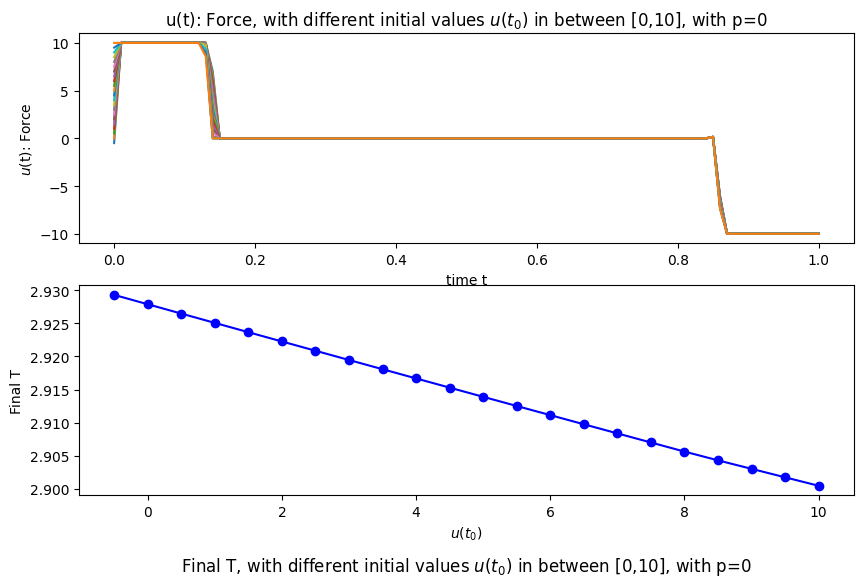

In [32]:
nrPoint = len(us)
import math

#plt.figure(1)
fig=plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
new_T = []
new_U = []
for i in range(nrPoint): 
    ui = us[i]
    if math.isnan(ui[0]): 
        pass
    else:
        plt.plot(m.time, ui)
        new_T.append(ts_values[i])
        new_U.append(ui[0])
        plt.xlabel("time t")
        plt.ylabel('$u$(t): Force')
        #plt.xticks(fontsize=24)
        #plt.yticks(fontsize=24)
        plt.title("u(t): Force, with different initial values $u(t_0)$ in between [0,10], with p=0")
        
plt.subplot(2,1,2)        
plt.plot(new_U, new_T,'ob-')   
plt.xlabel("$u(t_0)$")
plt.ylabel('Final T')
#plt.xticks(fontsize=24)
#plt.yticks(fontsize=24)
plt.title("Final T, with different initial values $u(t_0)$ in between [0,10], with p=0", y=-0.4)

plt.show()

#### 

In [ ]:
def plot_p(p, m, tf, s, v , u):    
    ts = m.time * tf.value[0] # scaled time

    # plot results
    plt.figure(1)
    plt.subplot(3,1,1)
    plt.plot(ts,s.value,'r-',lw=2)
    plt.ylabel('Position')
    plt.legend(['x_1 (Position)'])

    plt.subplot(3,1,2)
    plt.plot(ts,v.value,'b-',lw=2)
    plt.ylabel('Velocity')
    plt.legend(['x_2 (Velocity)'])

    plt.subplot(3,1,3)
    plt.plot(ts,u.value,'g-',lw=2)
    plt.ylabel('Force')
    plt.legend(['u (Force)'])

    plt.xlabel('Time')
    plt.title(f"The numerical solution (T= {tf.value[0]}) with p = {p}",y=-0.8)
    plt.show()

In [ ]:
# p = 0
# m, tf, s, v , u  = get_solver(p)
# plot_p(p, m, tf, s, v , u)
